In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### 读取经过预处理的训练集

In [2]:
features_data = pd.read_csv('../datasets/train_preprocess.csv', parse_dates=['Dates'])

In [3]:
features_data.head(1)

,Dates,Category,DayOfWeek,PdDistrict,Address,X,Y,Year,Month,Day,...,PdDistrictID,HasBlock,RoadType,RoadTypeID,RoadName1,RoadName2,RoadBlock,RoadBlockID,RoadName1ID,RoadName2ID
0,2015-05-13 23:53:00,WARRANTS,Wednesday,NORTHERN,OAK ST / LAGUNA ST,-122.425892,37.774599,2015,5,13,...,4,0,CrossRoad,5,OAK,LAGUNA,Unkown,84,1296,842


In [4]:
categories = features_data['Category'].unique()
categories.sort()

In [5]:
def show_bar_by_column(data, split_feature, name, split_feature_names=None, top_n_split_feature=None,
                       counter_feature="Category", cols=3,  barh=True, figsize=(10,10)):
    """
    split_feature:
        用于过滤数据，小图的标题。
    
    split_feature_names:
        type: list
        split_feature的值类型数较多时，可以指定画图显示那些值。
        与top_n_split_feature互斥使用。
    
    top_n_split_feature:
        split_feature的值类型数较多时，按样本数排序，仅画图TOP N。
        与split_feature_names互斥使用。

    """
    if split_feature_names is None:
        split_feature_names = data[split_feature].unique()
    nums = len(split_feature_names)
    rows = nums//cols+1
    lables = data[counter_feature].unique()

    temp = data.loc[:, [split_feature, counter_feature]]
    
    plt.figure(num=name, figsize=figsize)
    for i, title in enumerate(split_feature_names):
        plt.subplot(rows,cols, i+1)
        cnts = temp.loc[temp[split_feature]==title, counter_feature].value_counts()
        show_data = [cnts[lable] if lable in cnts else 0 for lable in lables]
        if barh:
            plt.barh(y=lables, width=show_data)
        else:
            plt.bar(x=lables, height=show_data)
        plt.title(title)
    plt.savefig("../images_intime/"+name+".png")
    plt.show()
    return plt

### DayOfWeek

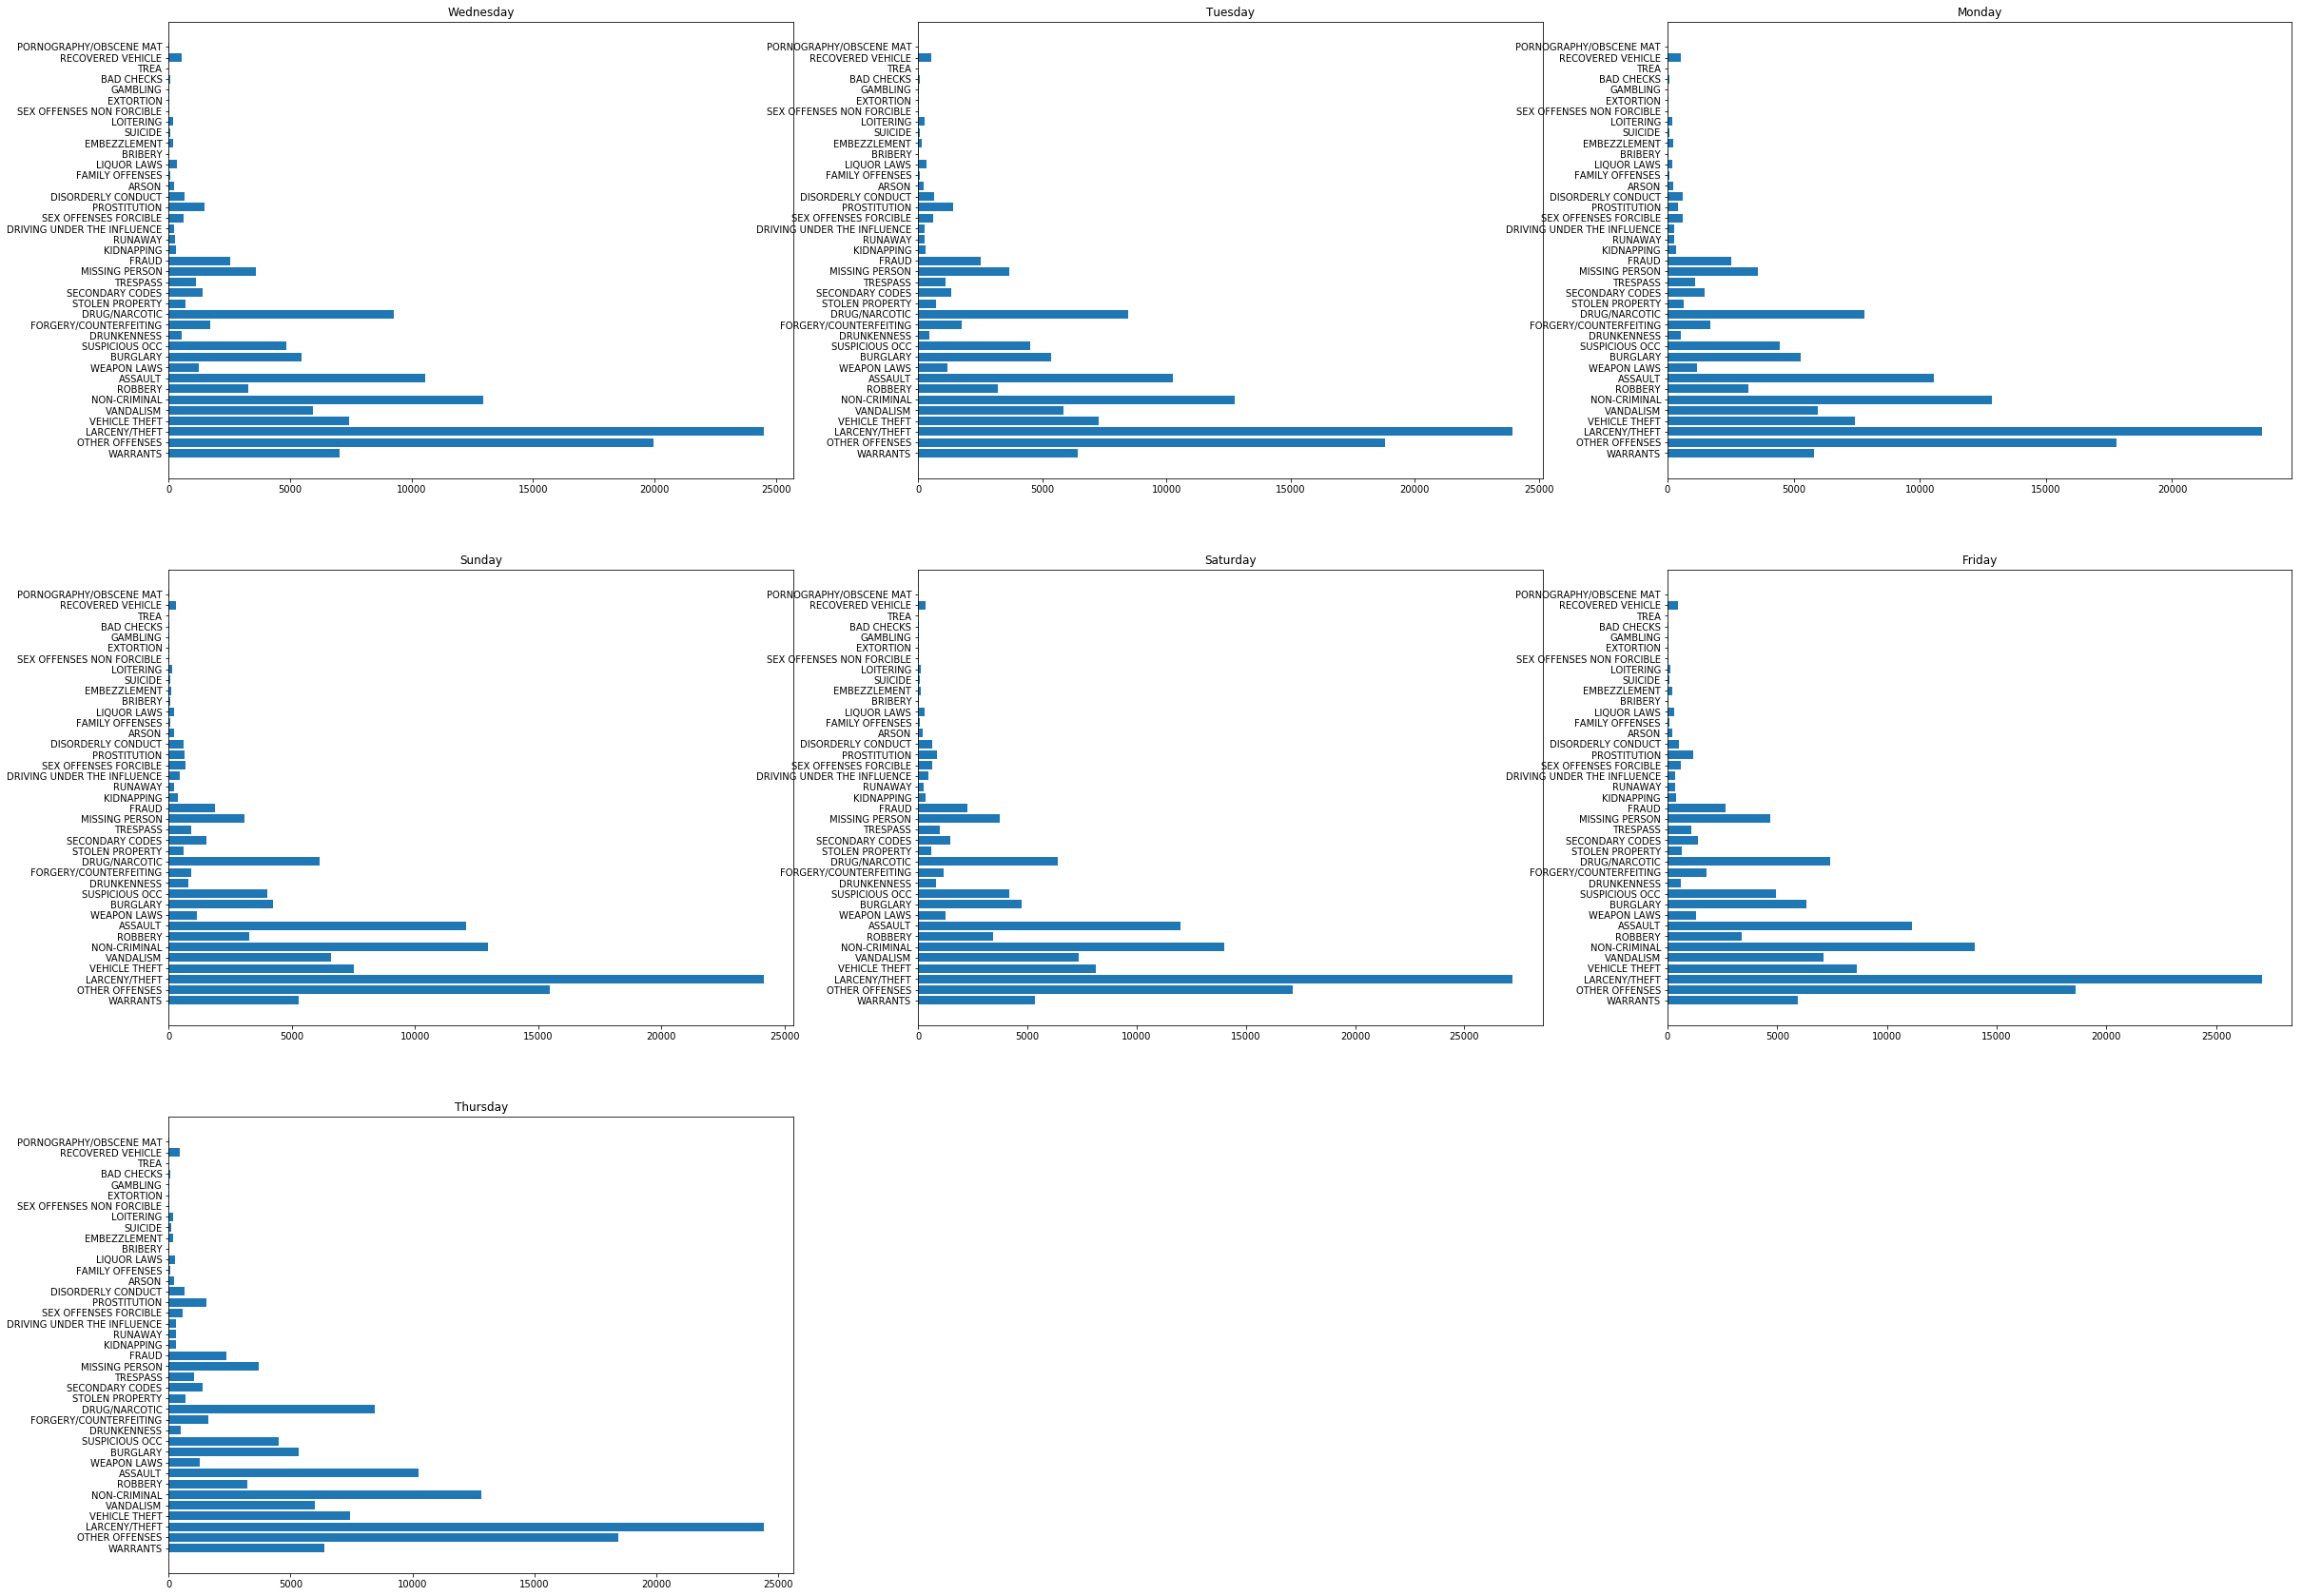

<module 'matplotlib.pyplot' from 'd:\\Anaconda3\\envs\\gym\\lib\\site-packages\\matplotlib\\pyplot.py'>

In [6]:
show_bar_by_column(data=features_data, 
                   split_feature="DayOfWeek",
                   name='weekday_and_categories',                
                   figsize=(40,30))

从图表中可以看出，对于一种罪案类型，每天发生的次数基本持平，对于预测犯罪类型，星期几这个特征可以意义不大。

### Year

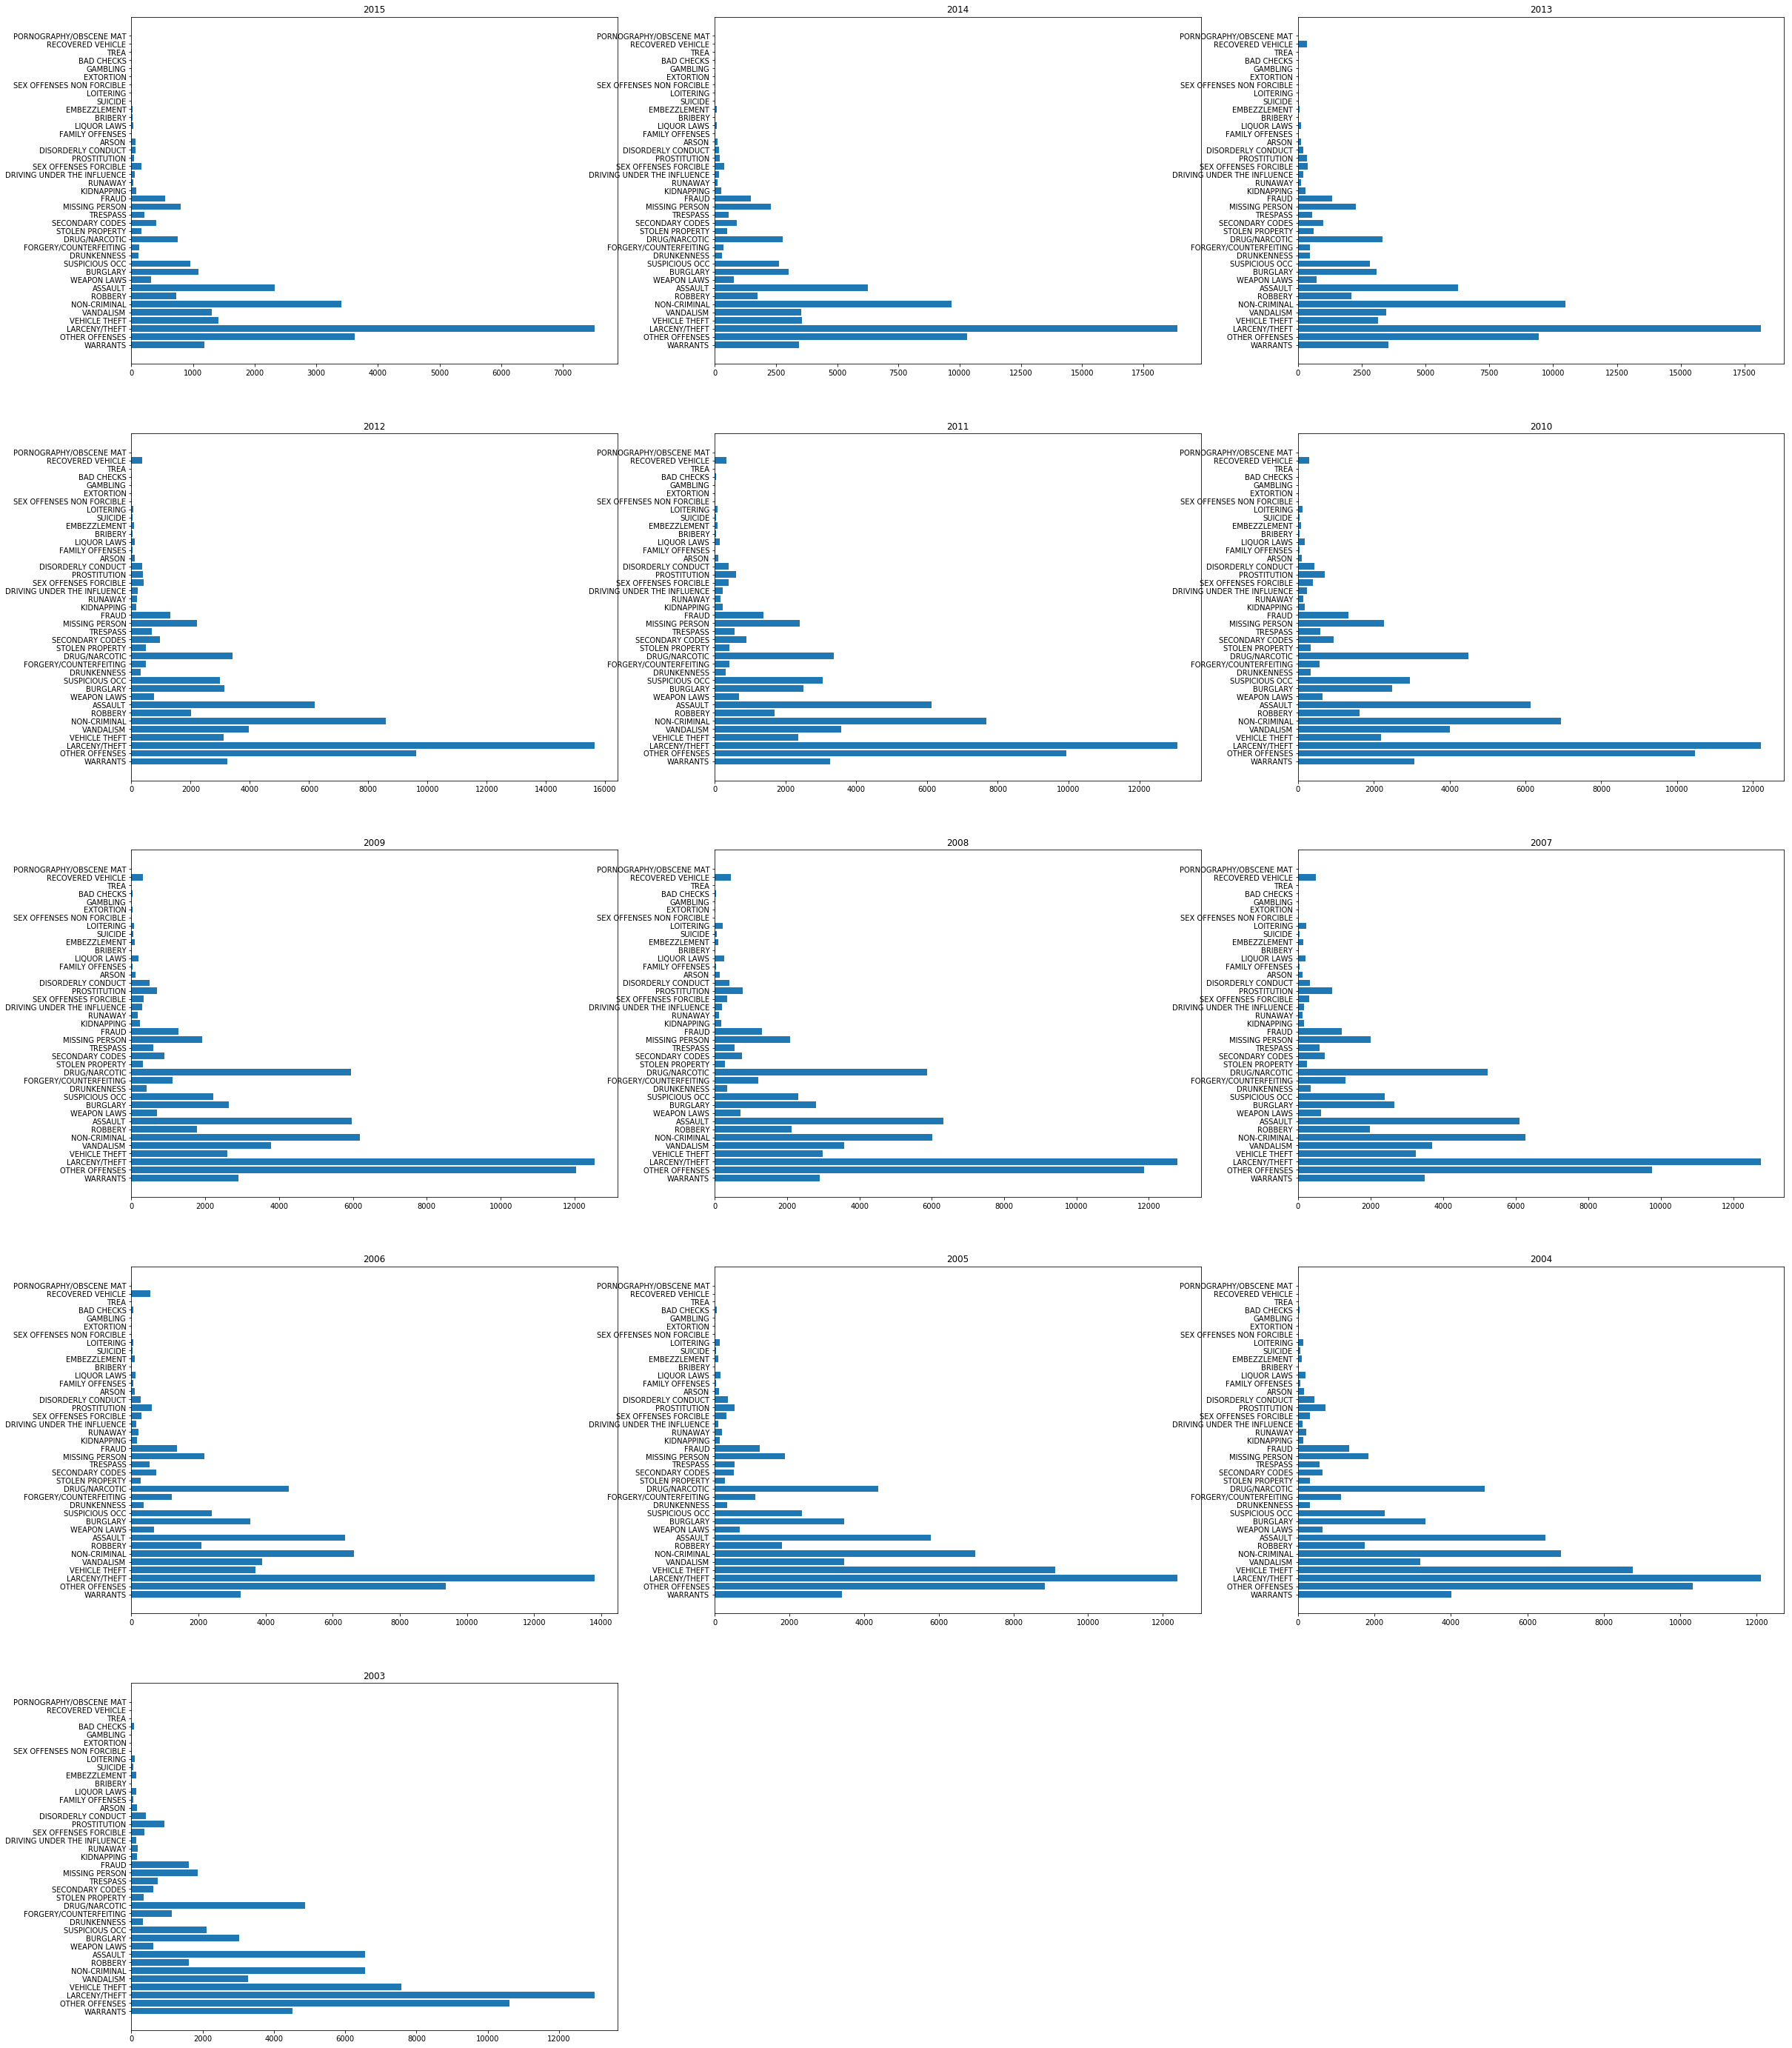

<module 'matplotlib.pyplot' from 'd:\\Anaconda3\\envs\\gym\\lib\\site-packages\\matplotlib\\pyplot.py'>

In [7]:
show_bar_by_column(data=features_data, 
                   split_feature="Year",
                   name='year_and_categories', 
                   figsize=(40,50))

### Month

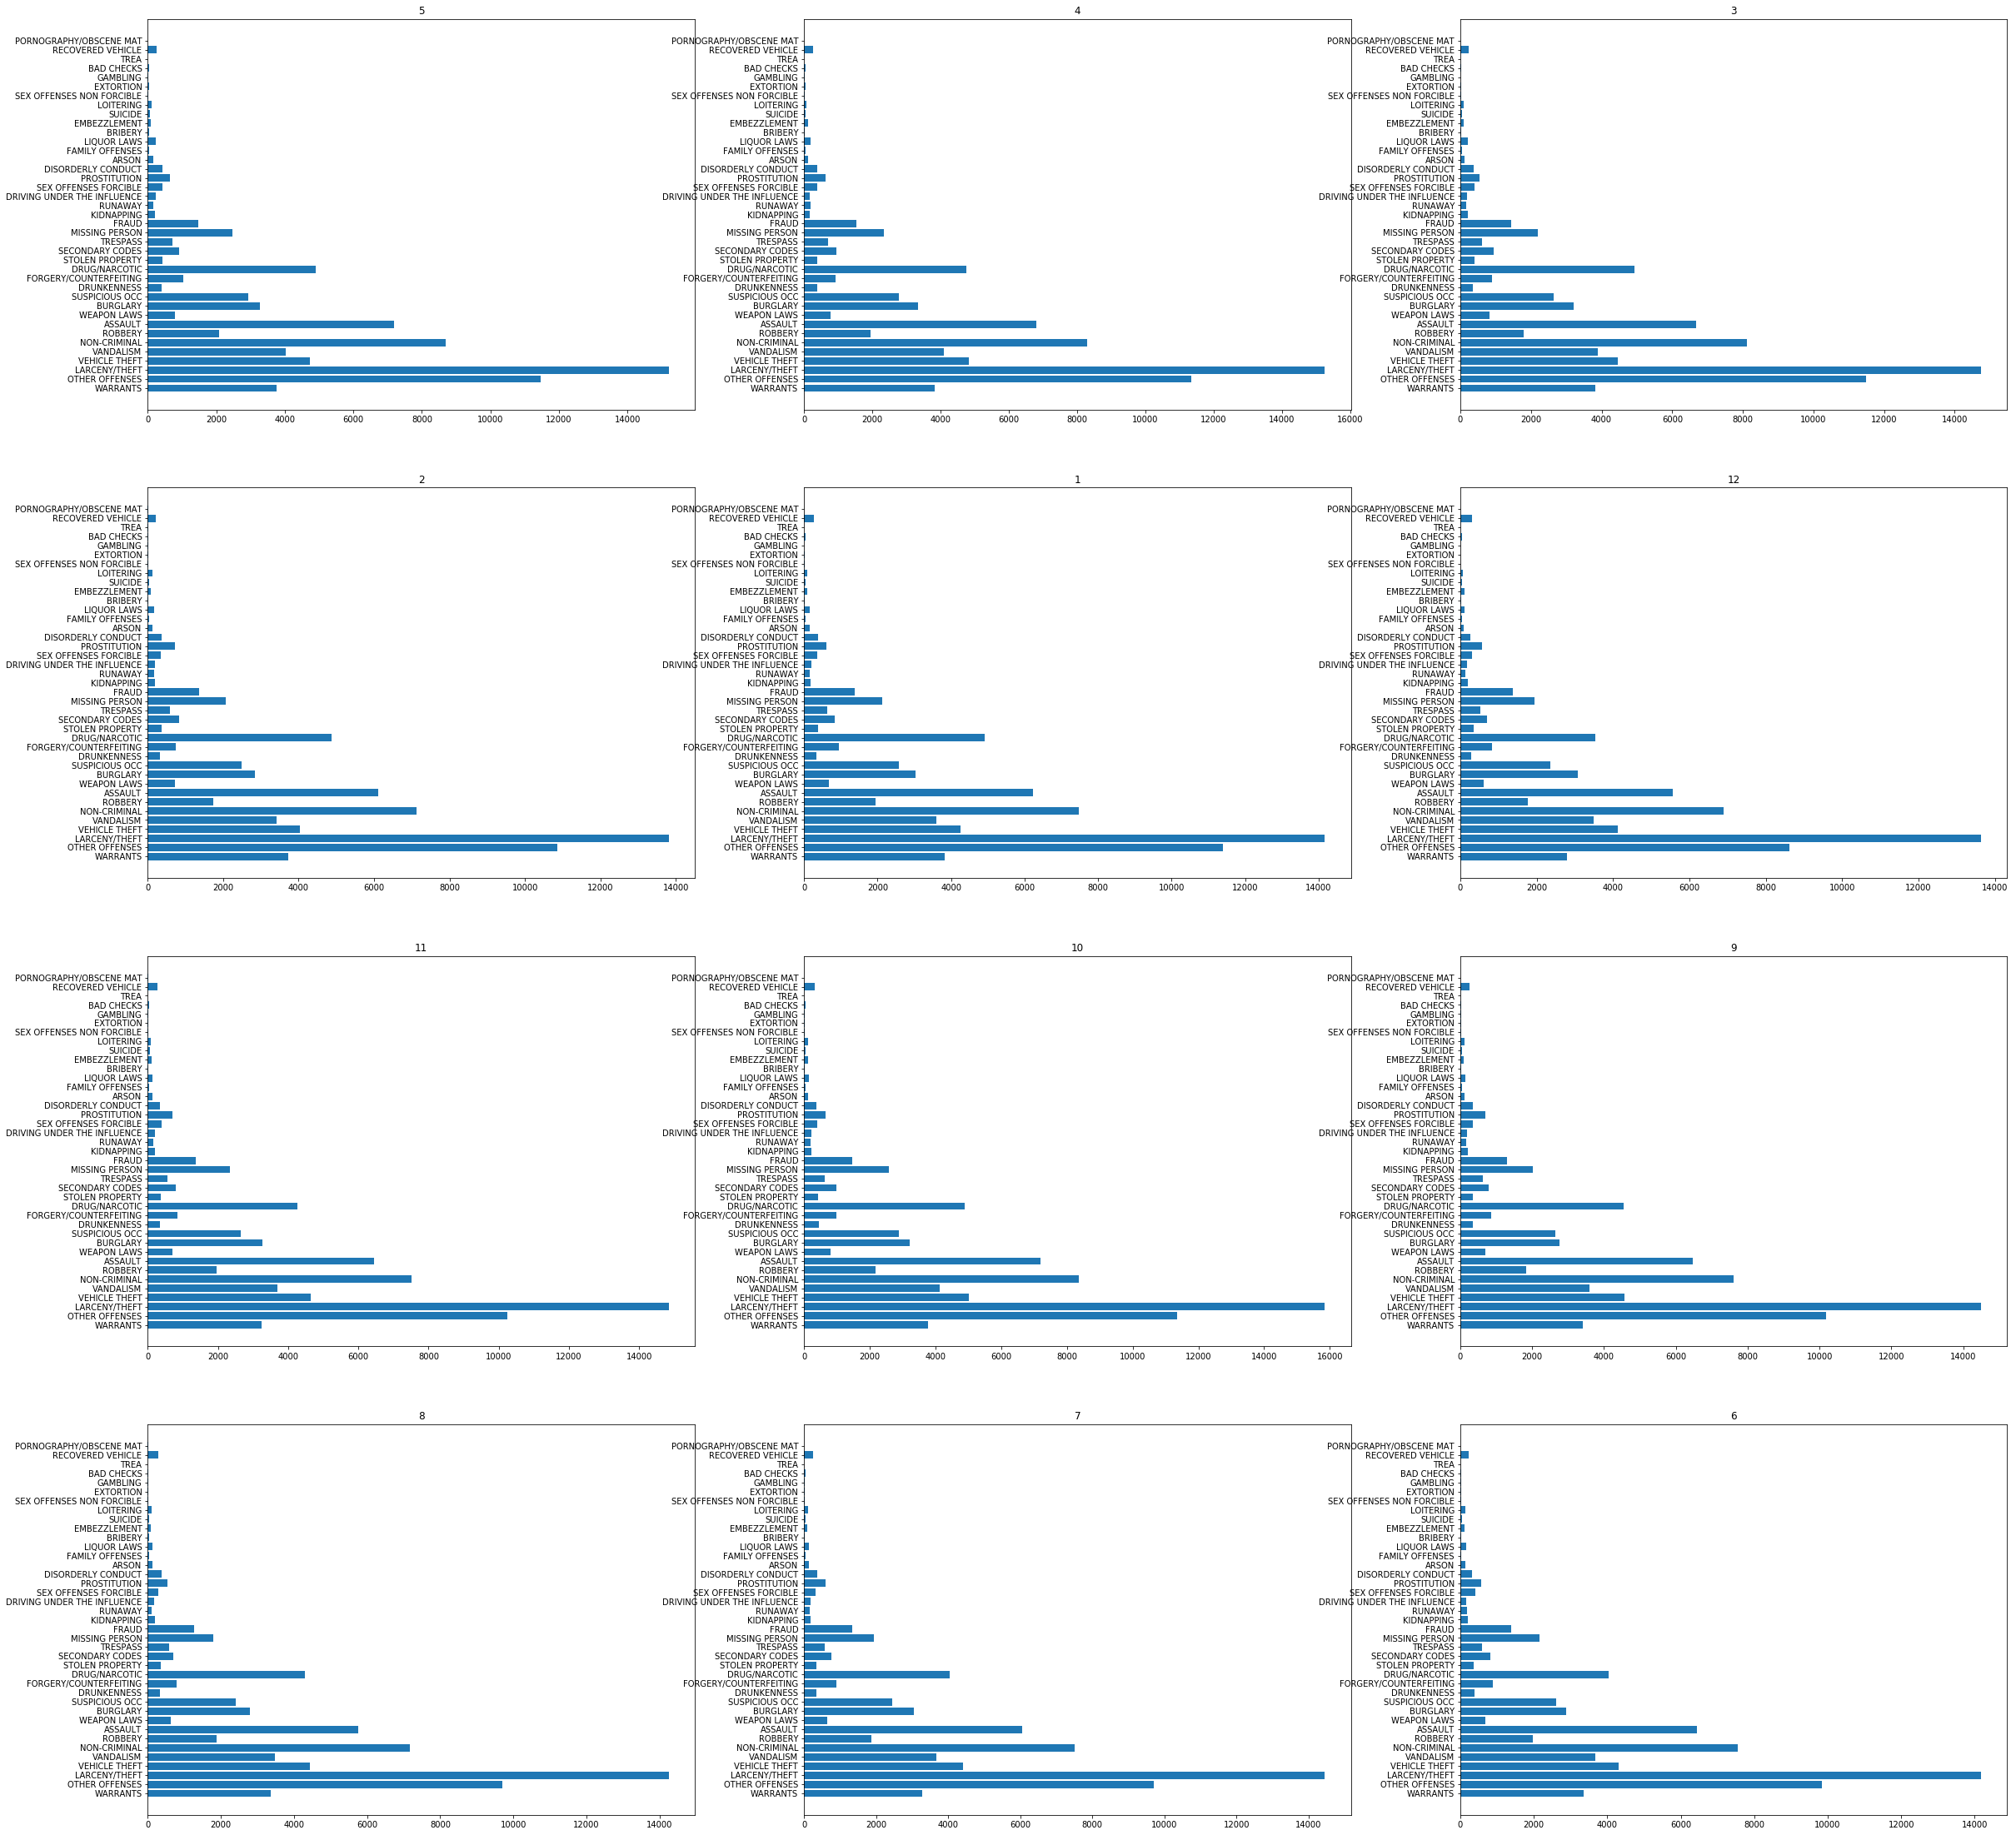

<module 'matplotlib.pyplot' from 'd:\\Anaconda3\\envs\\gym\\lib\\site-packages\\matplotlib\\pyplot.py'>

In [8]:
show_bar_by_column(data=features_data, 
                   split_feature="Month",
                   name='month_and_categories', 
                   figsize=(40,50))

### Day

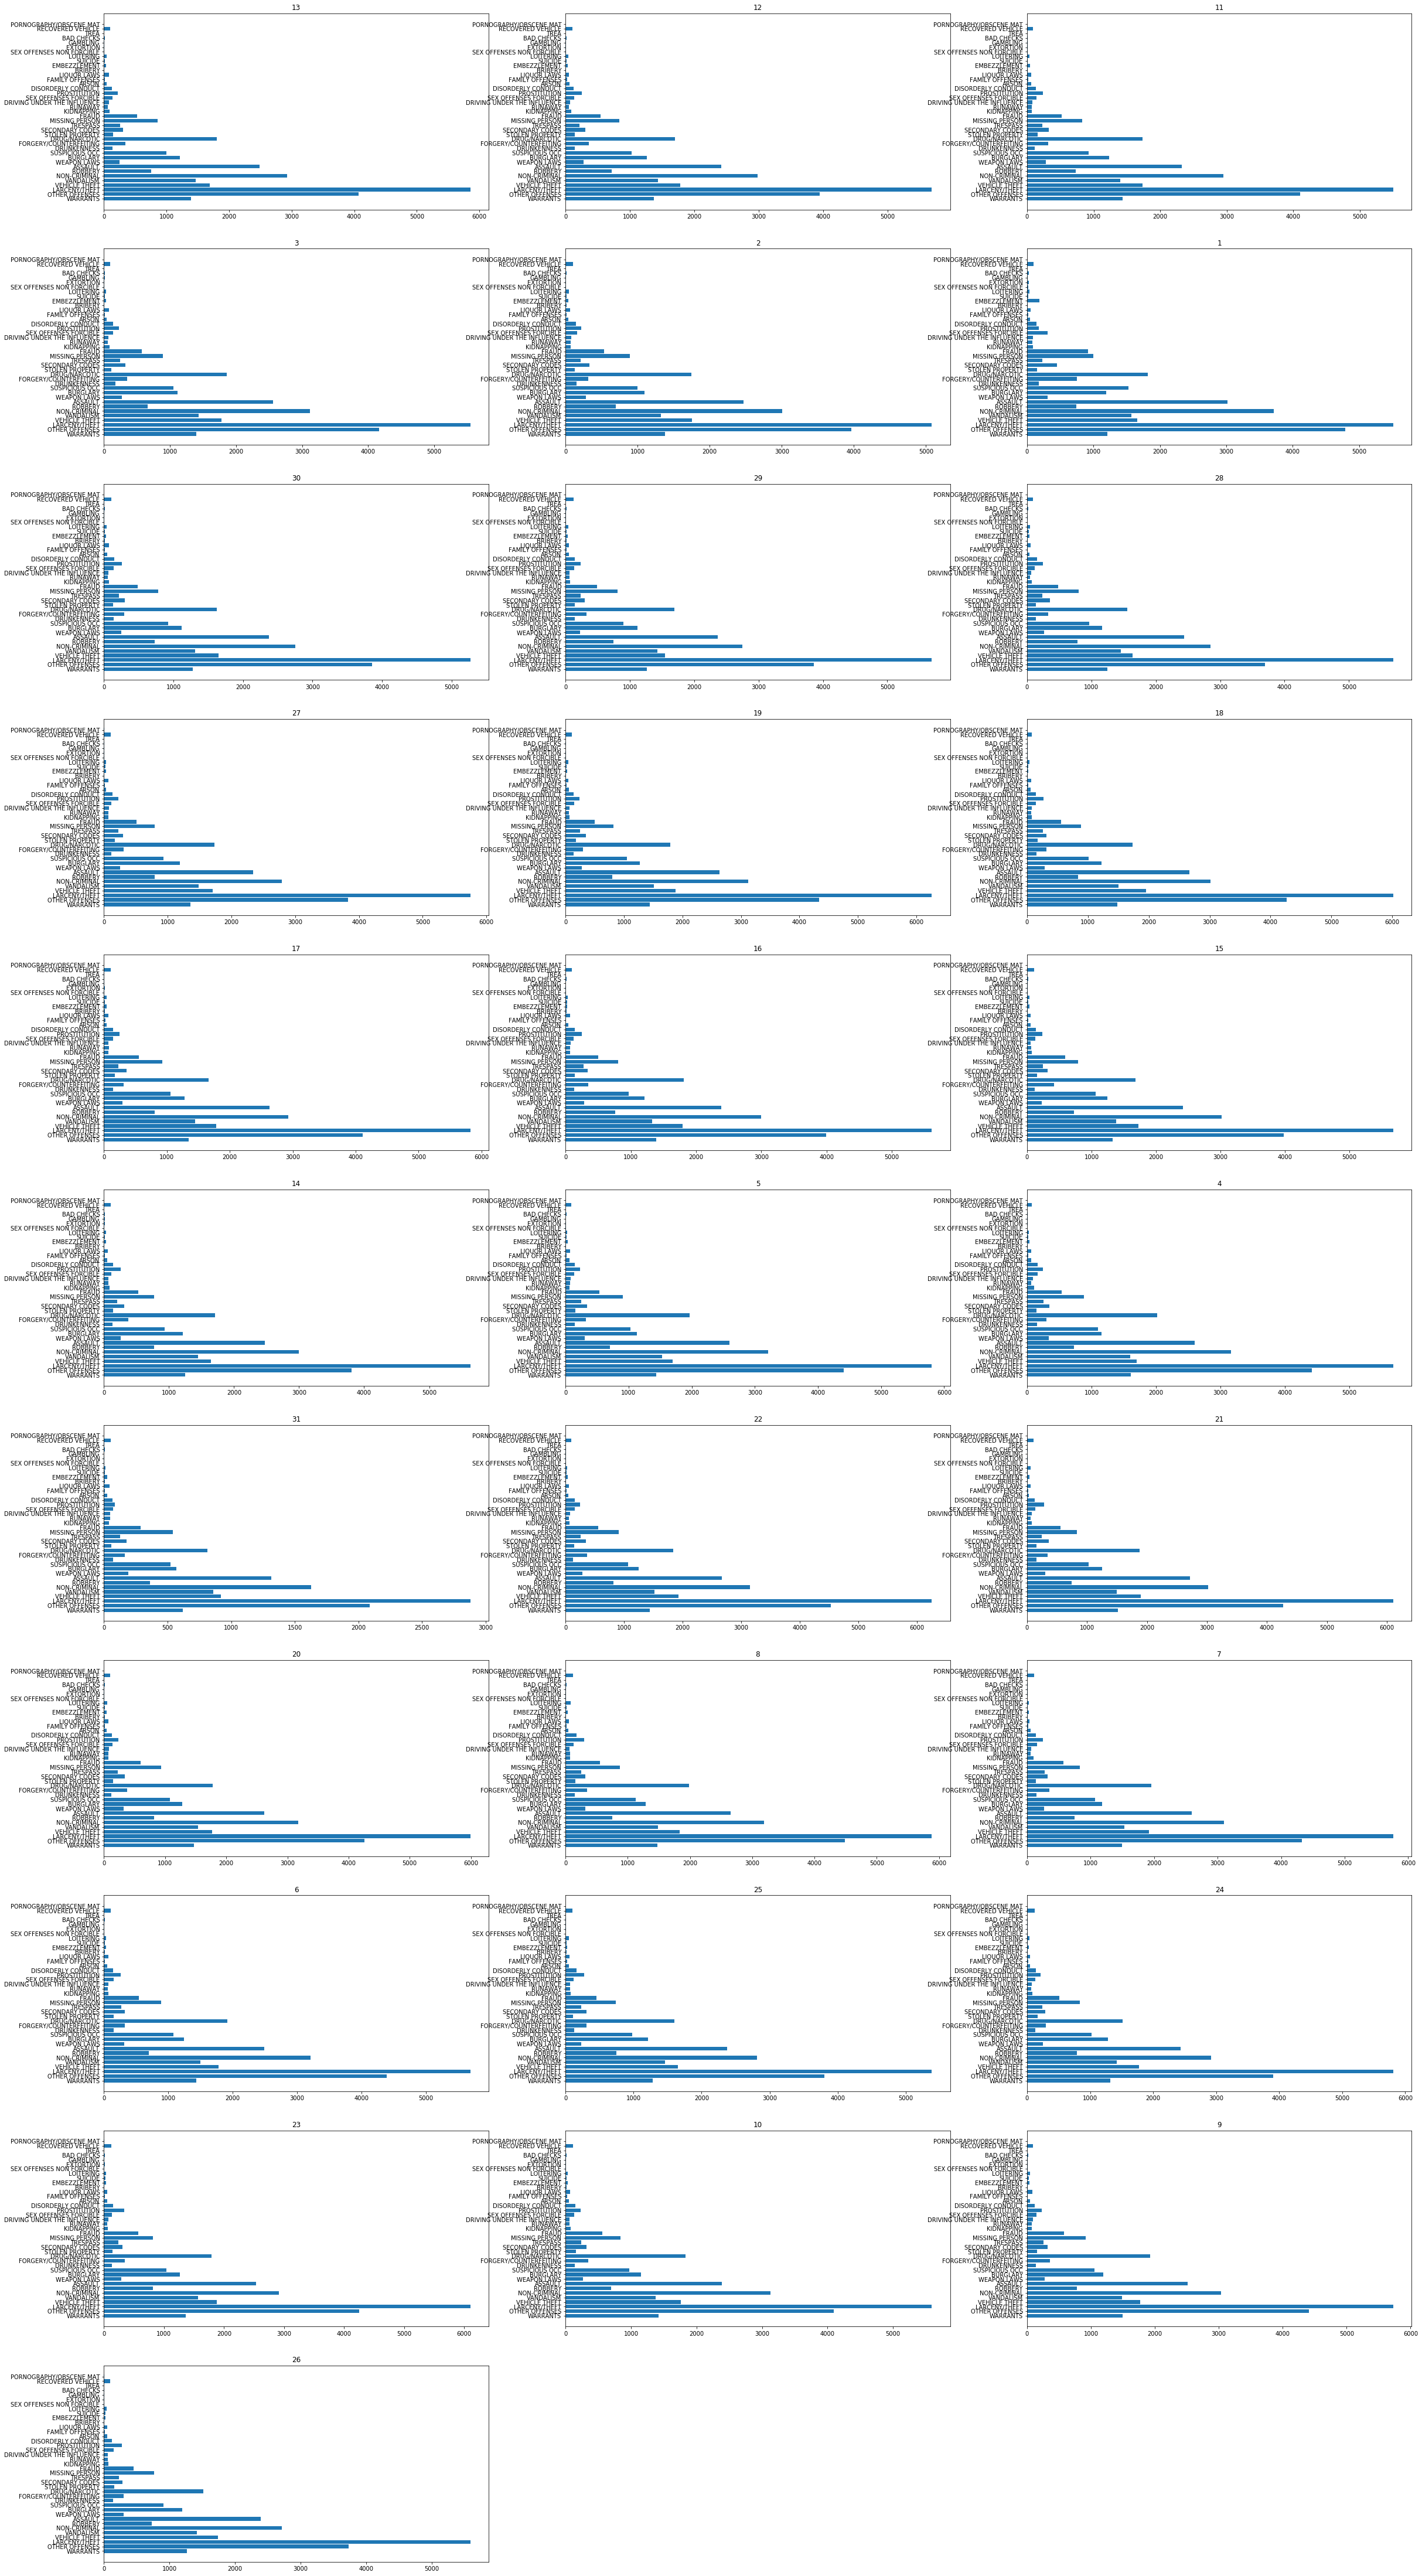

<module 'matplotlib.pyplot' from 'd:\\Anaconda3\\envs\\gym\\lib\\site-packages\\matplotlib\\pyplot.py'>

In [9]:
show_bar_by_column(data=features_data, 
                   split_feature="Day",
                   name='day_and_categories', 
                   figsize=(40,80))

### Hour

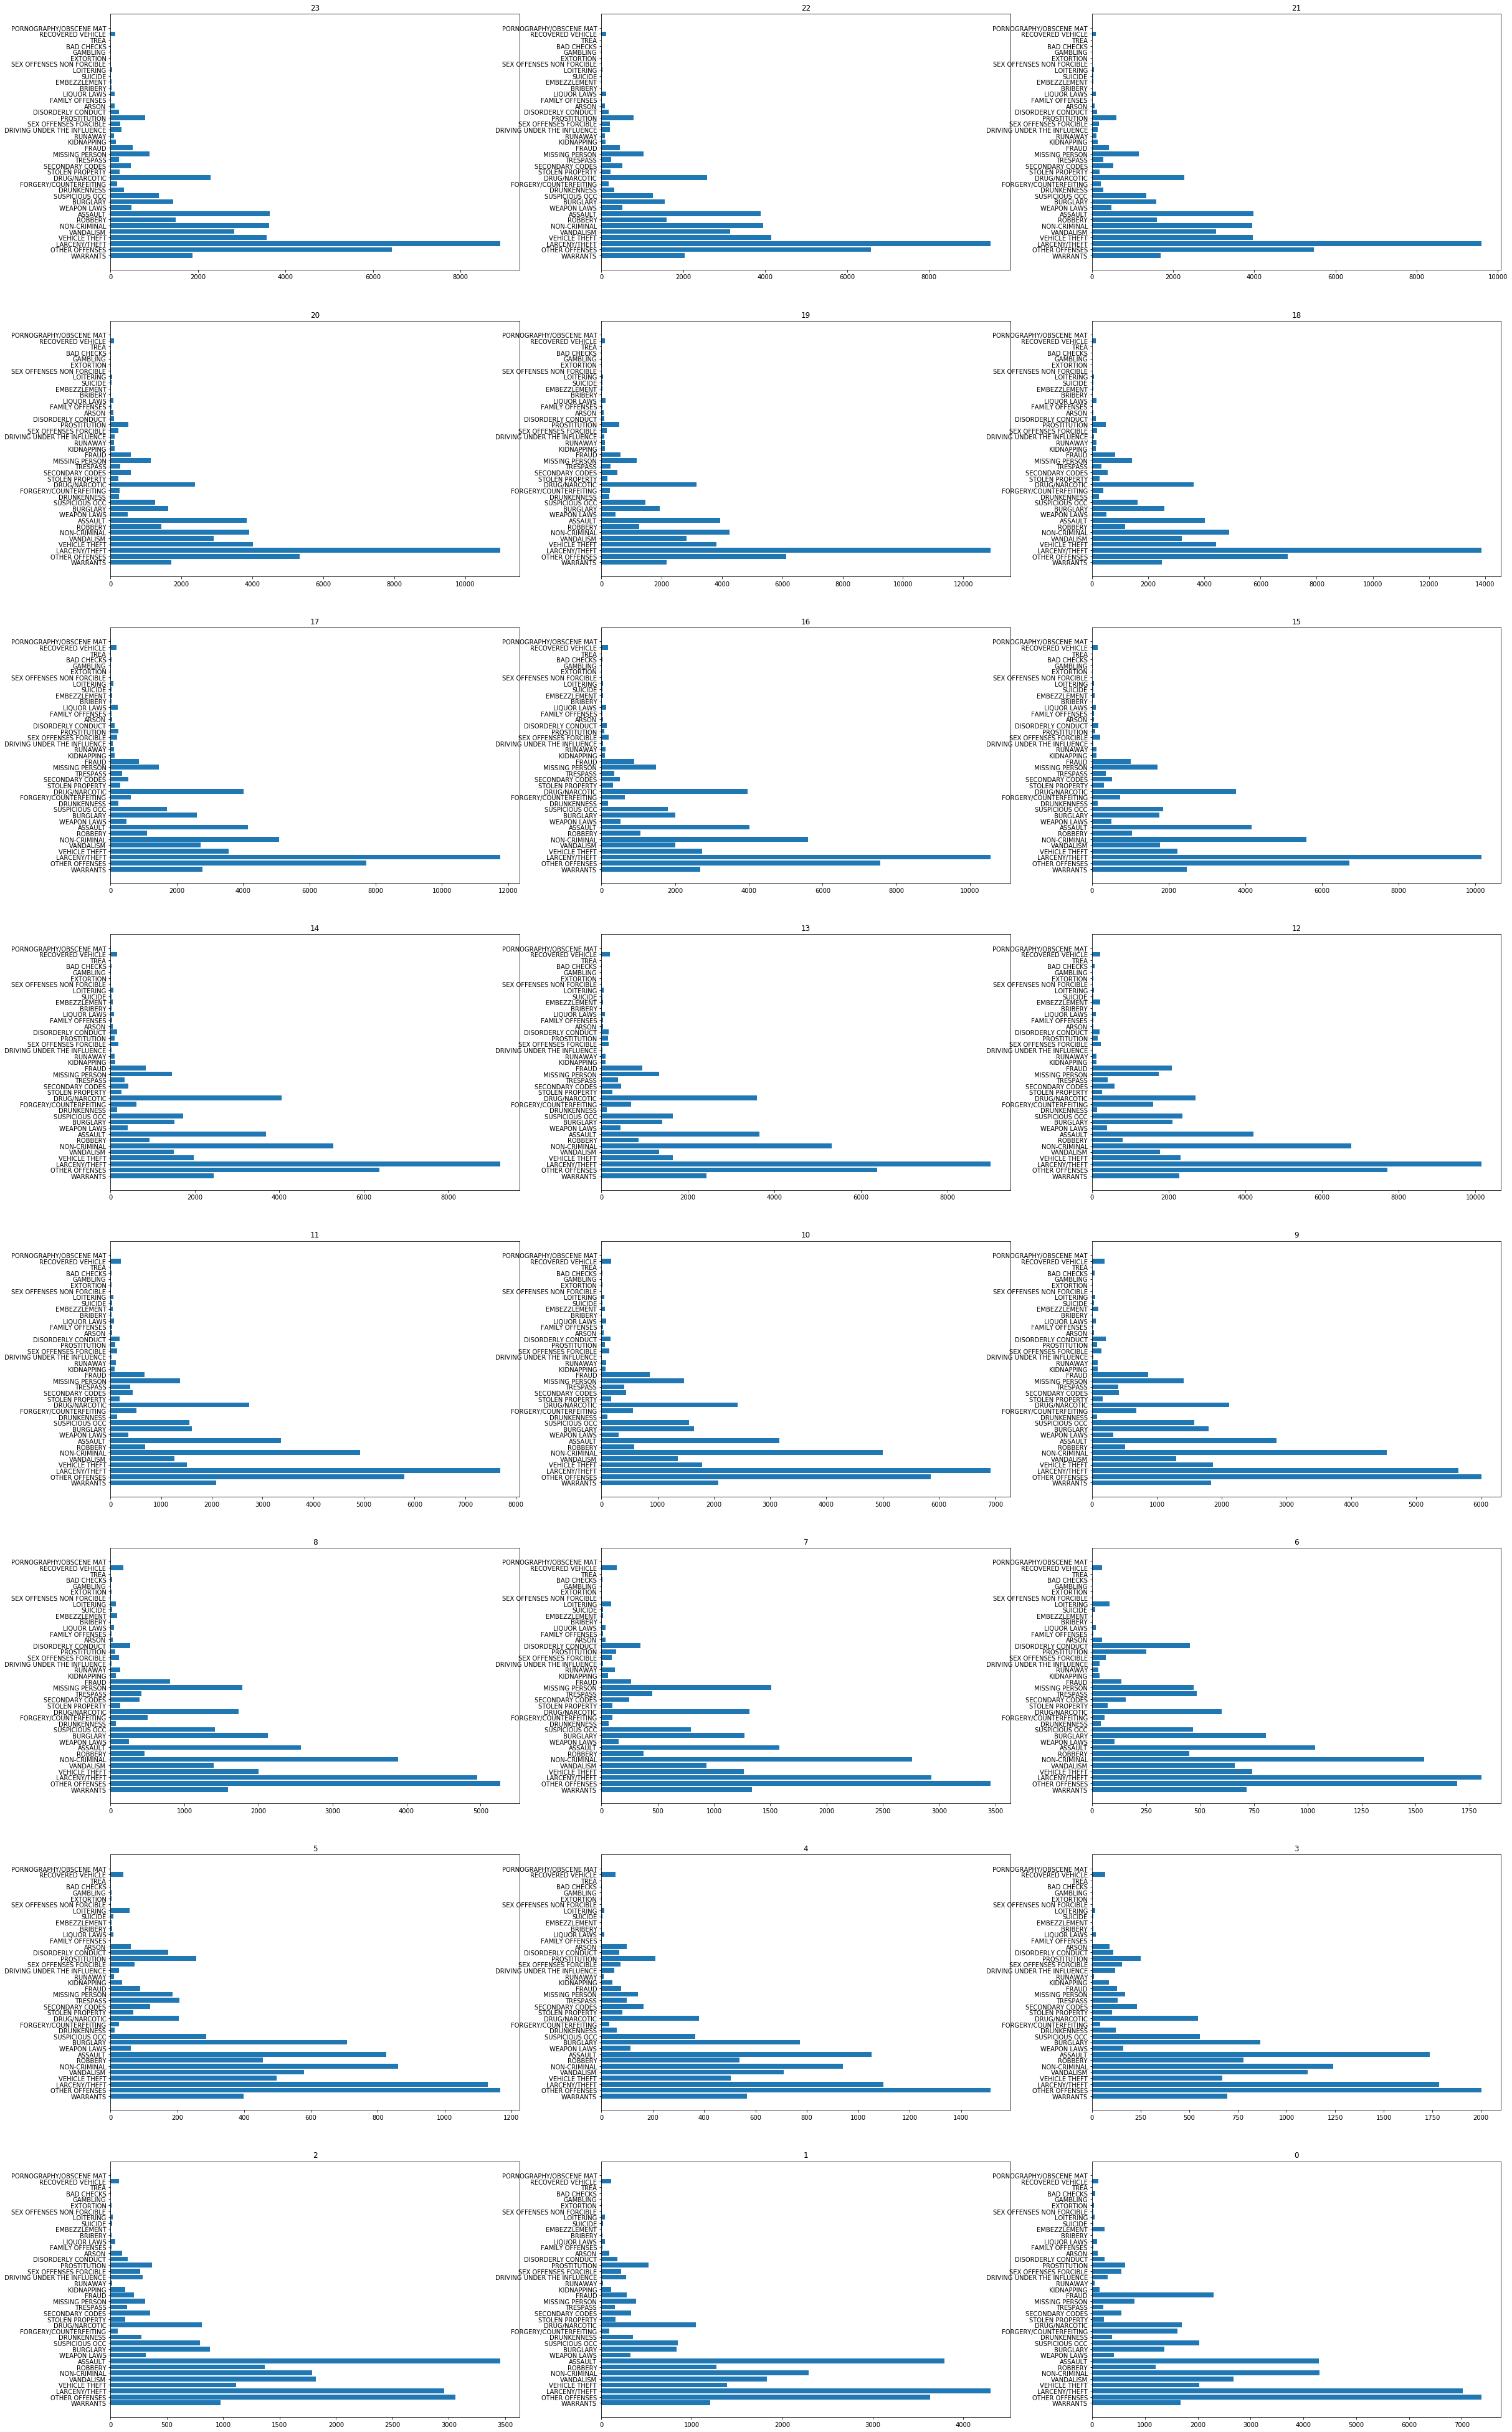

<module 'matplotlib.pyplot' from 'd:\\Anaconda3\\envs\\gym\\lib\\site-packages\\matplotlib\\pyplot.py'>

In [10]:
show_bar_by_column(data=features_data, 
                   split_feature="Hour",
                   name='hour_and_categories', 
                   figsize=(40,80))

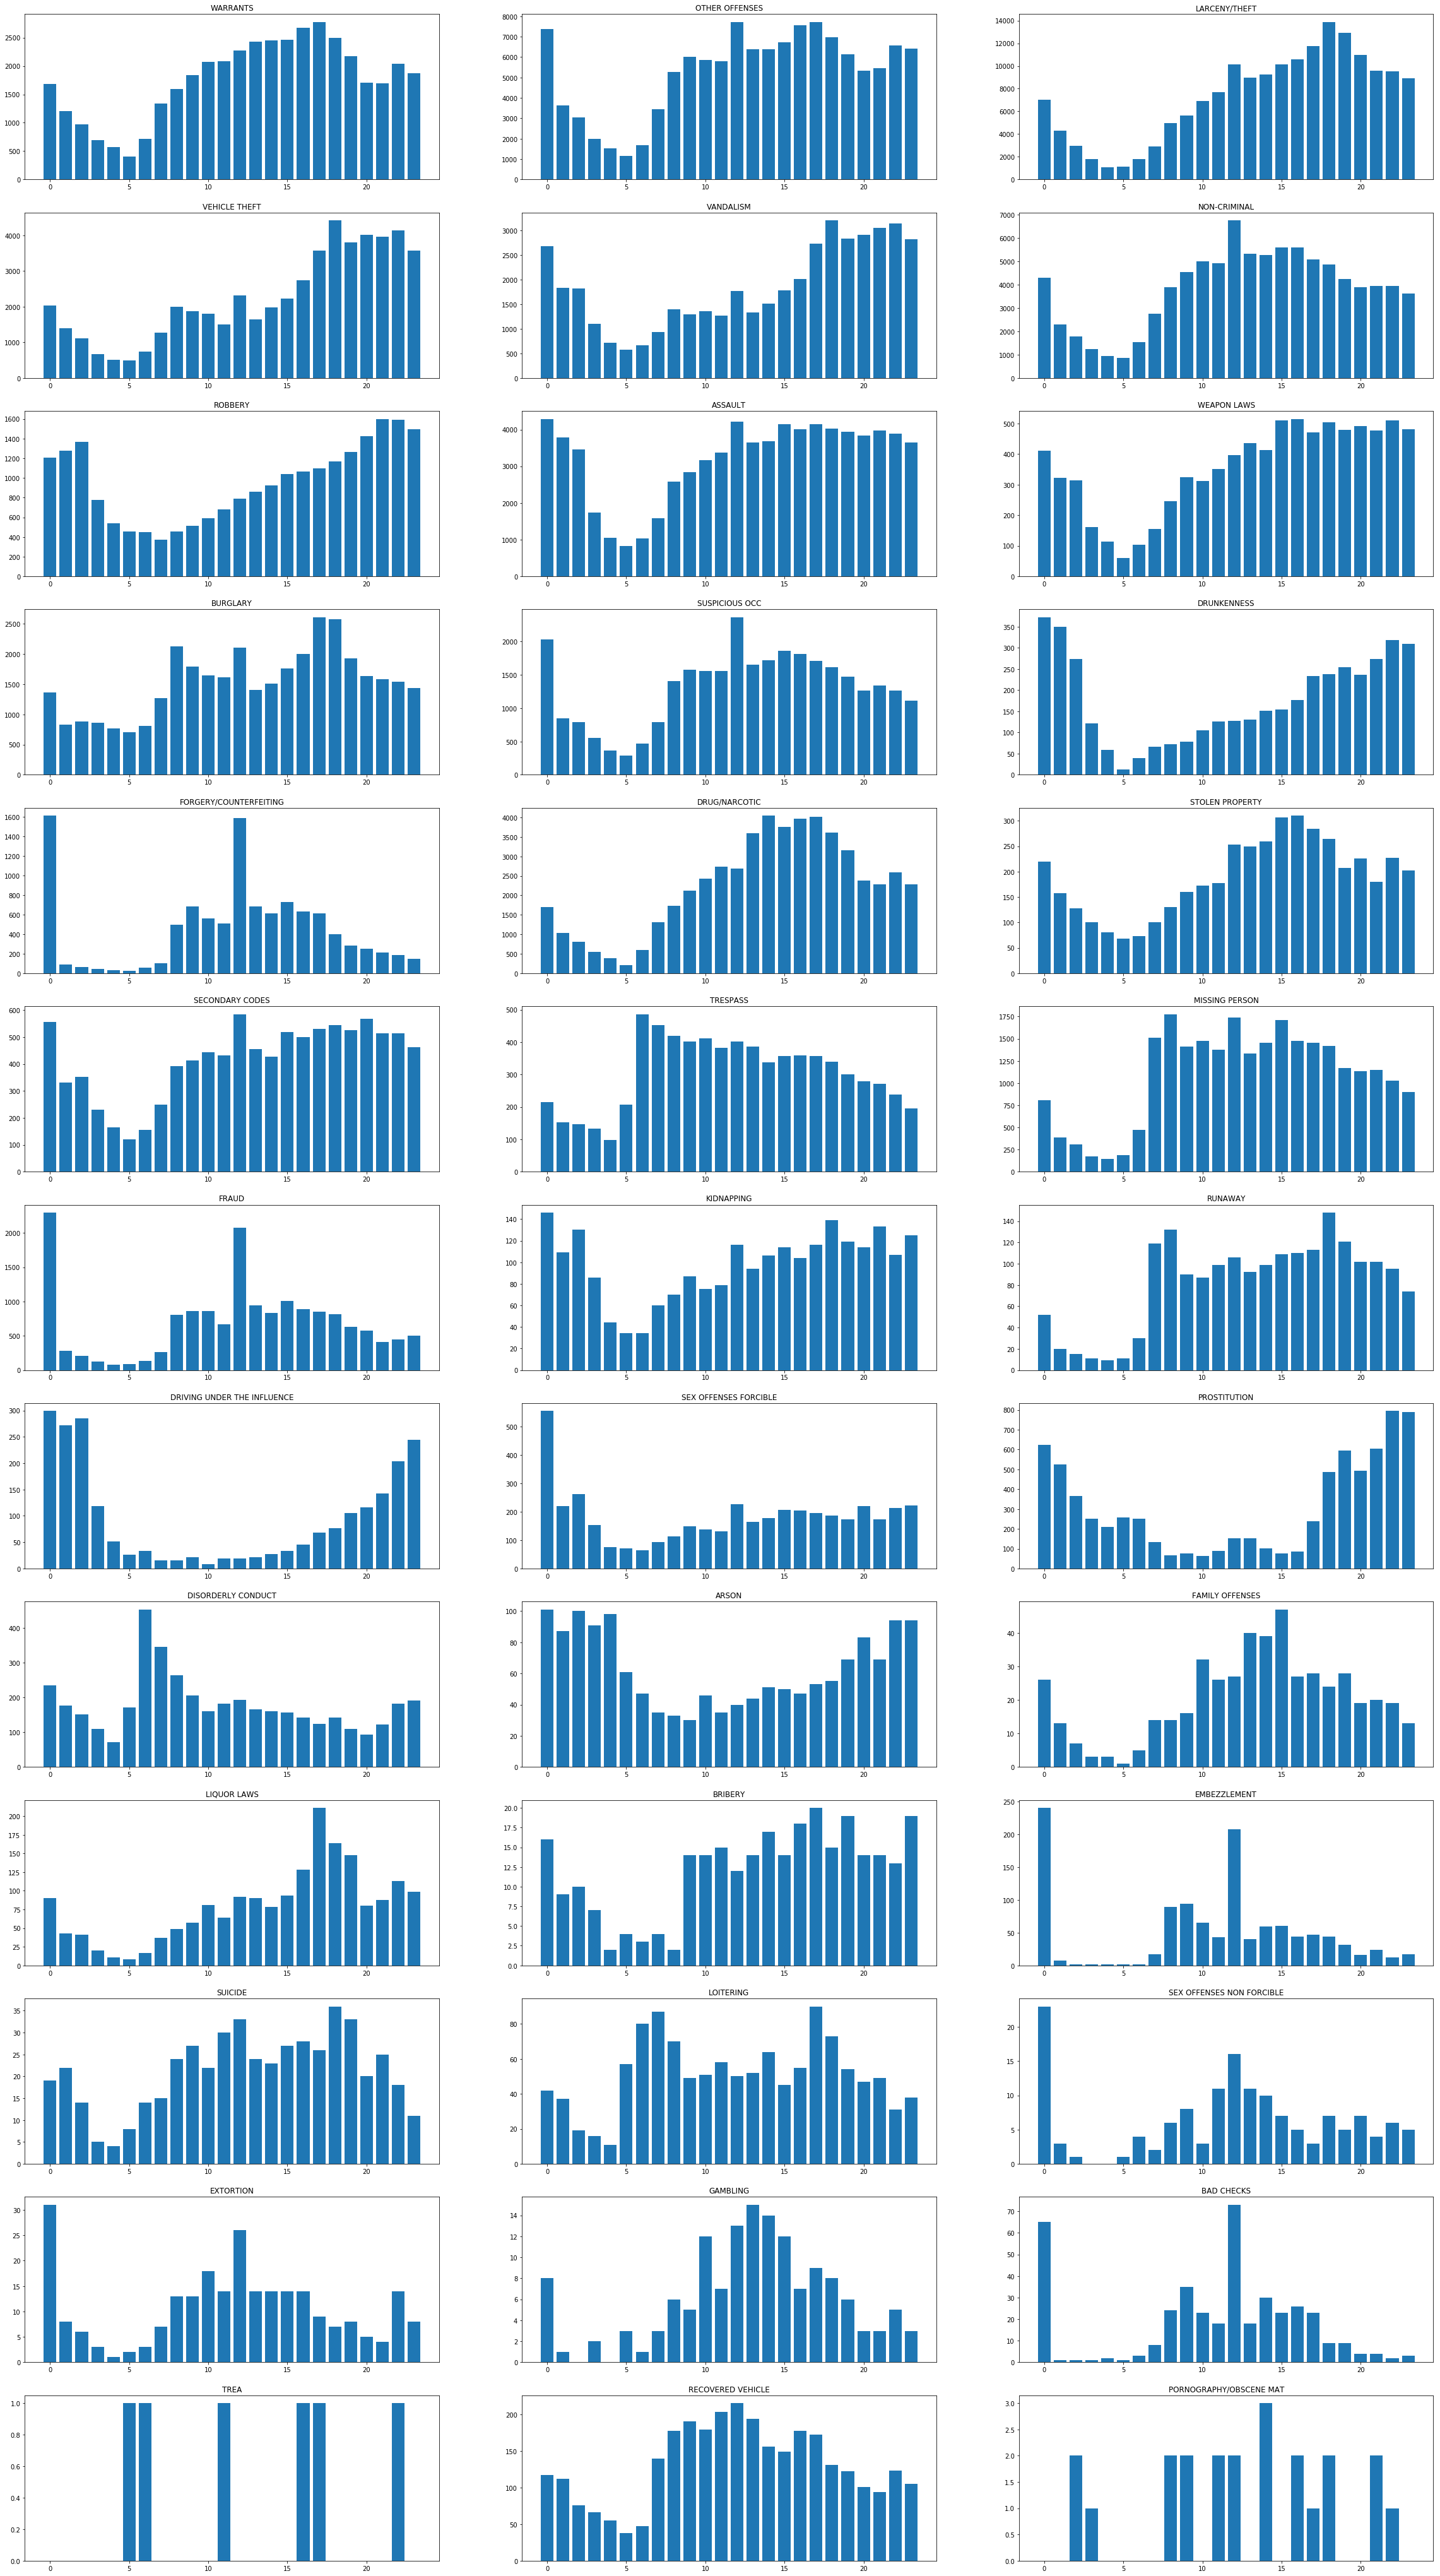

<module 'matplotlib.pyplot' from 'd:\\Anaconda3\\envs\\gym\\lib\\site-packages\\matplotlib\\pyplot.py'>

In [11]:
show_bar_by_column(data=features_data, 
                   split_feature="Category",
                   counter_feature = "Hour",
                   name='categories_and_hour',
                   barh = False,
                   figsize=(40,80))

### 按PdDistrict显示案件类型数

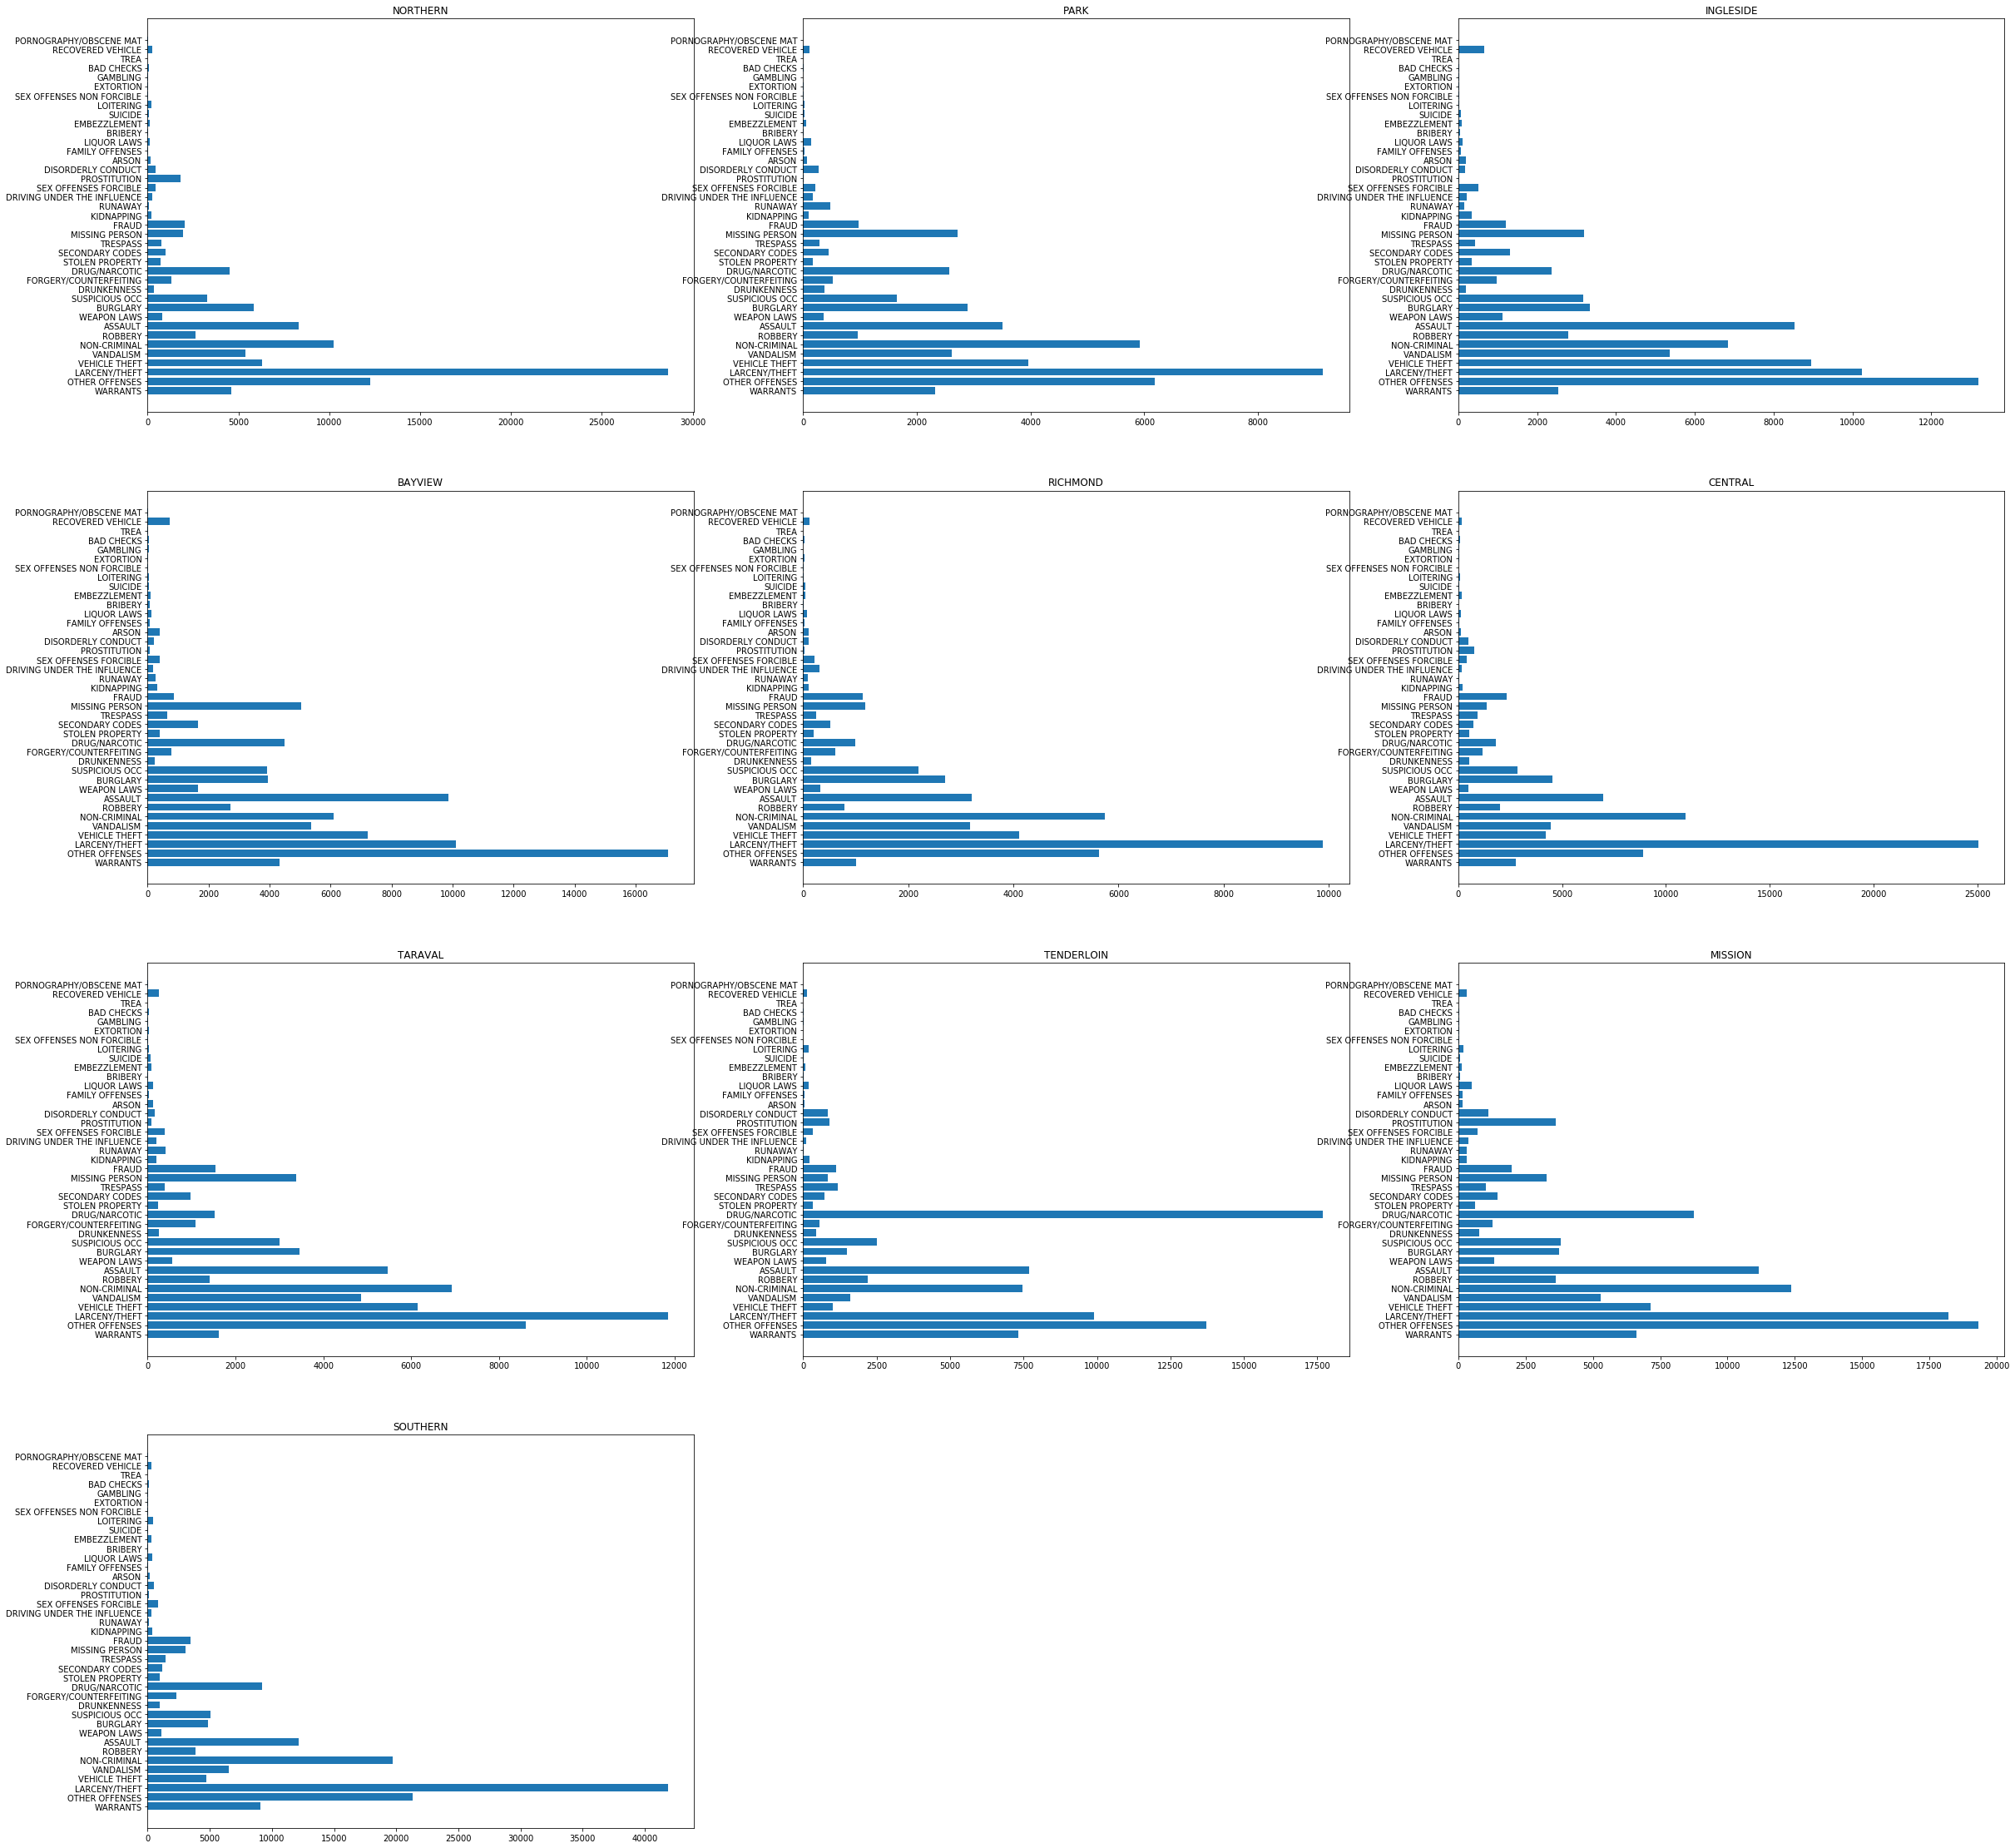

<module 'matplotlib.pyplot' from 'd:\\Anaconda3\\envs\\gym\\lib\\site-packages\\matplotlib\\pyplot.py'>

In [12]:
show_bar_by_column(data=features_data, 
                   split_feature="PdDistrict",
                   name='pddistrict_and_categories', 
                   figsize=(40,40))

#### 按PositionType显示案件数

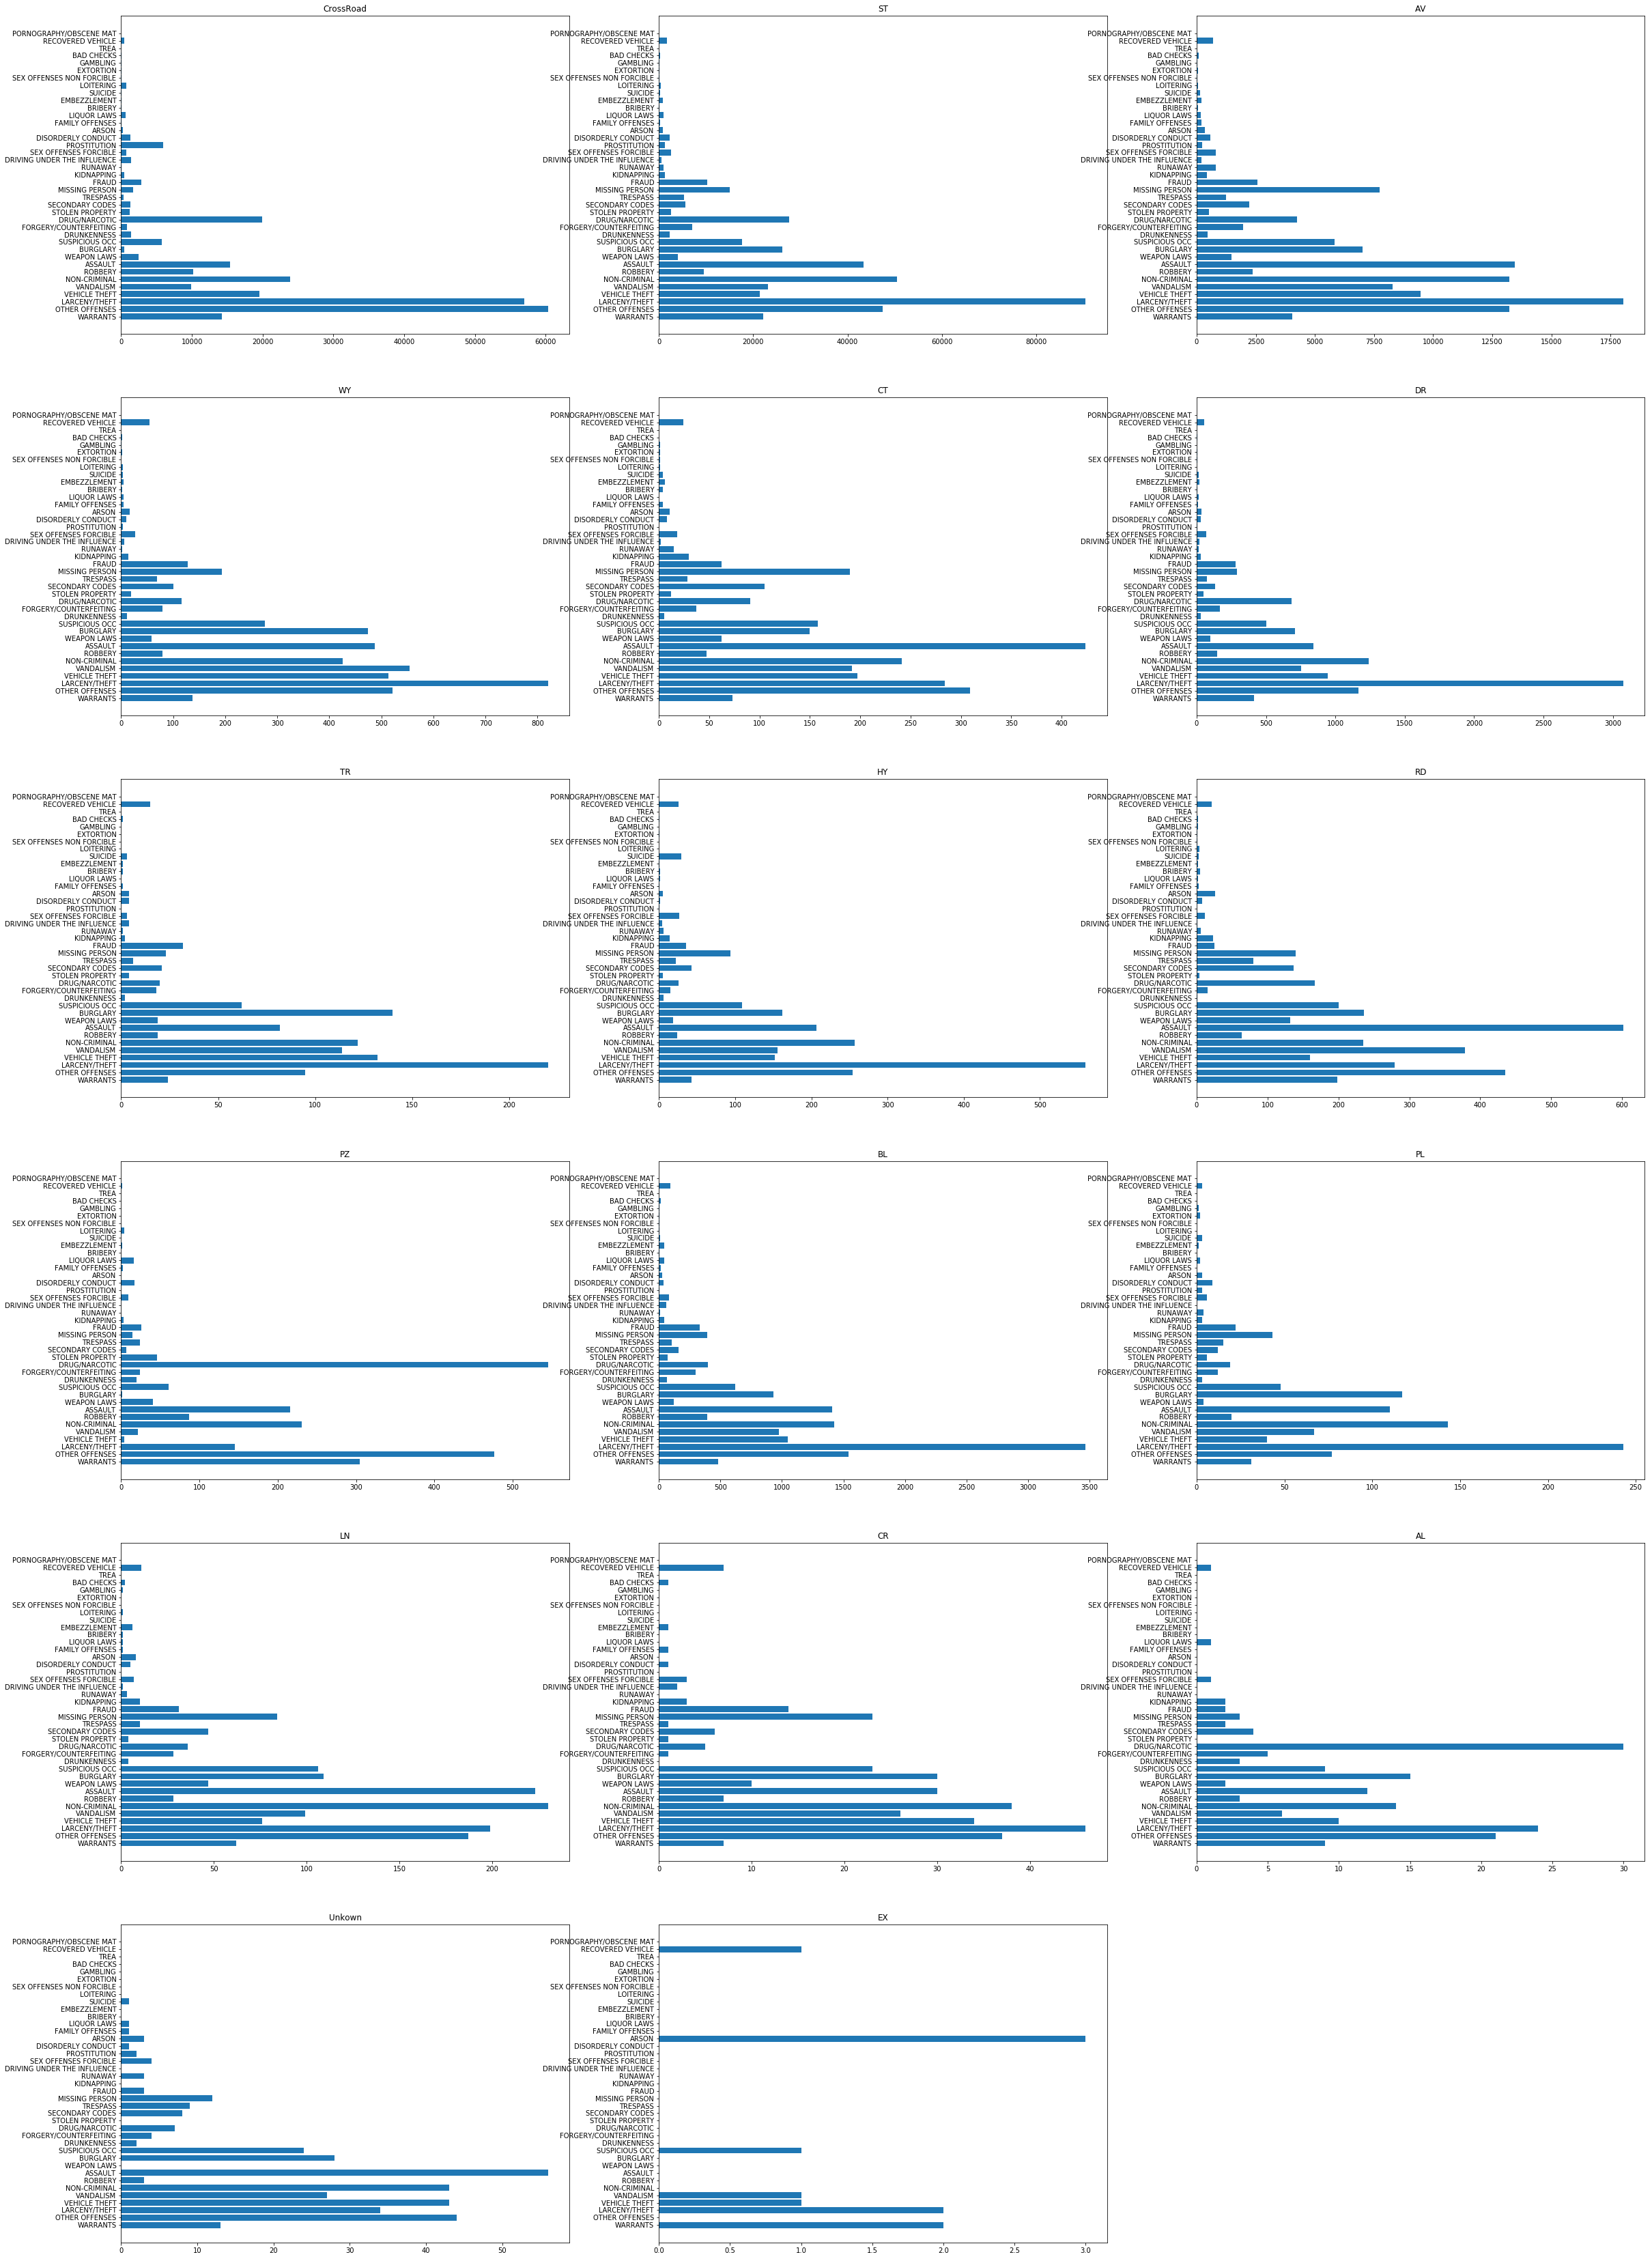

<module 'matplotlib.pyplot' from 'd:\\Anaconda3\\envs\\gym\\lib\\site-packages\\matplotlib\\pyplot.py'>

In [14]:
show_bar_by_column(data=features_data, 
                   split_feature="RoadType",
                   name='positiontype_and_categories', 
                   figsize=(40,60))

#### RoadName1

In [15]:
tmp = features_data["RoadName1"].value_counts()
names = tmp.index.tolist()
cnt = tmp.values
print(cnt.max(), cnt.min(), cnt.mean(), np.percentile(cnt,25), np.percentile(cnt, 75))

36744 1 446.8442748091603 12.0 189.0


In [24]:
#### 案件数前十的道路名称

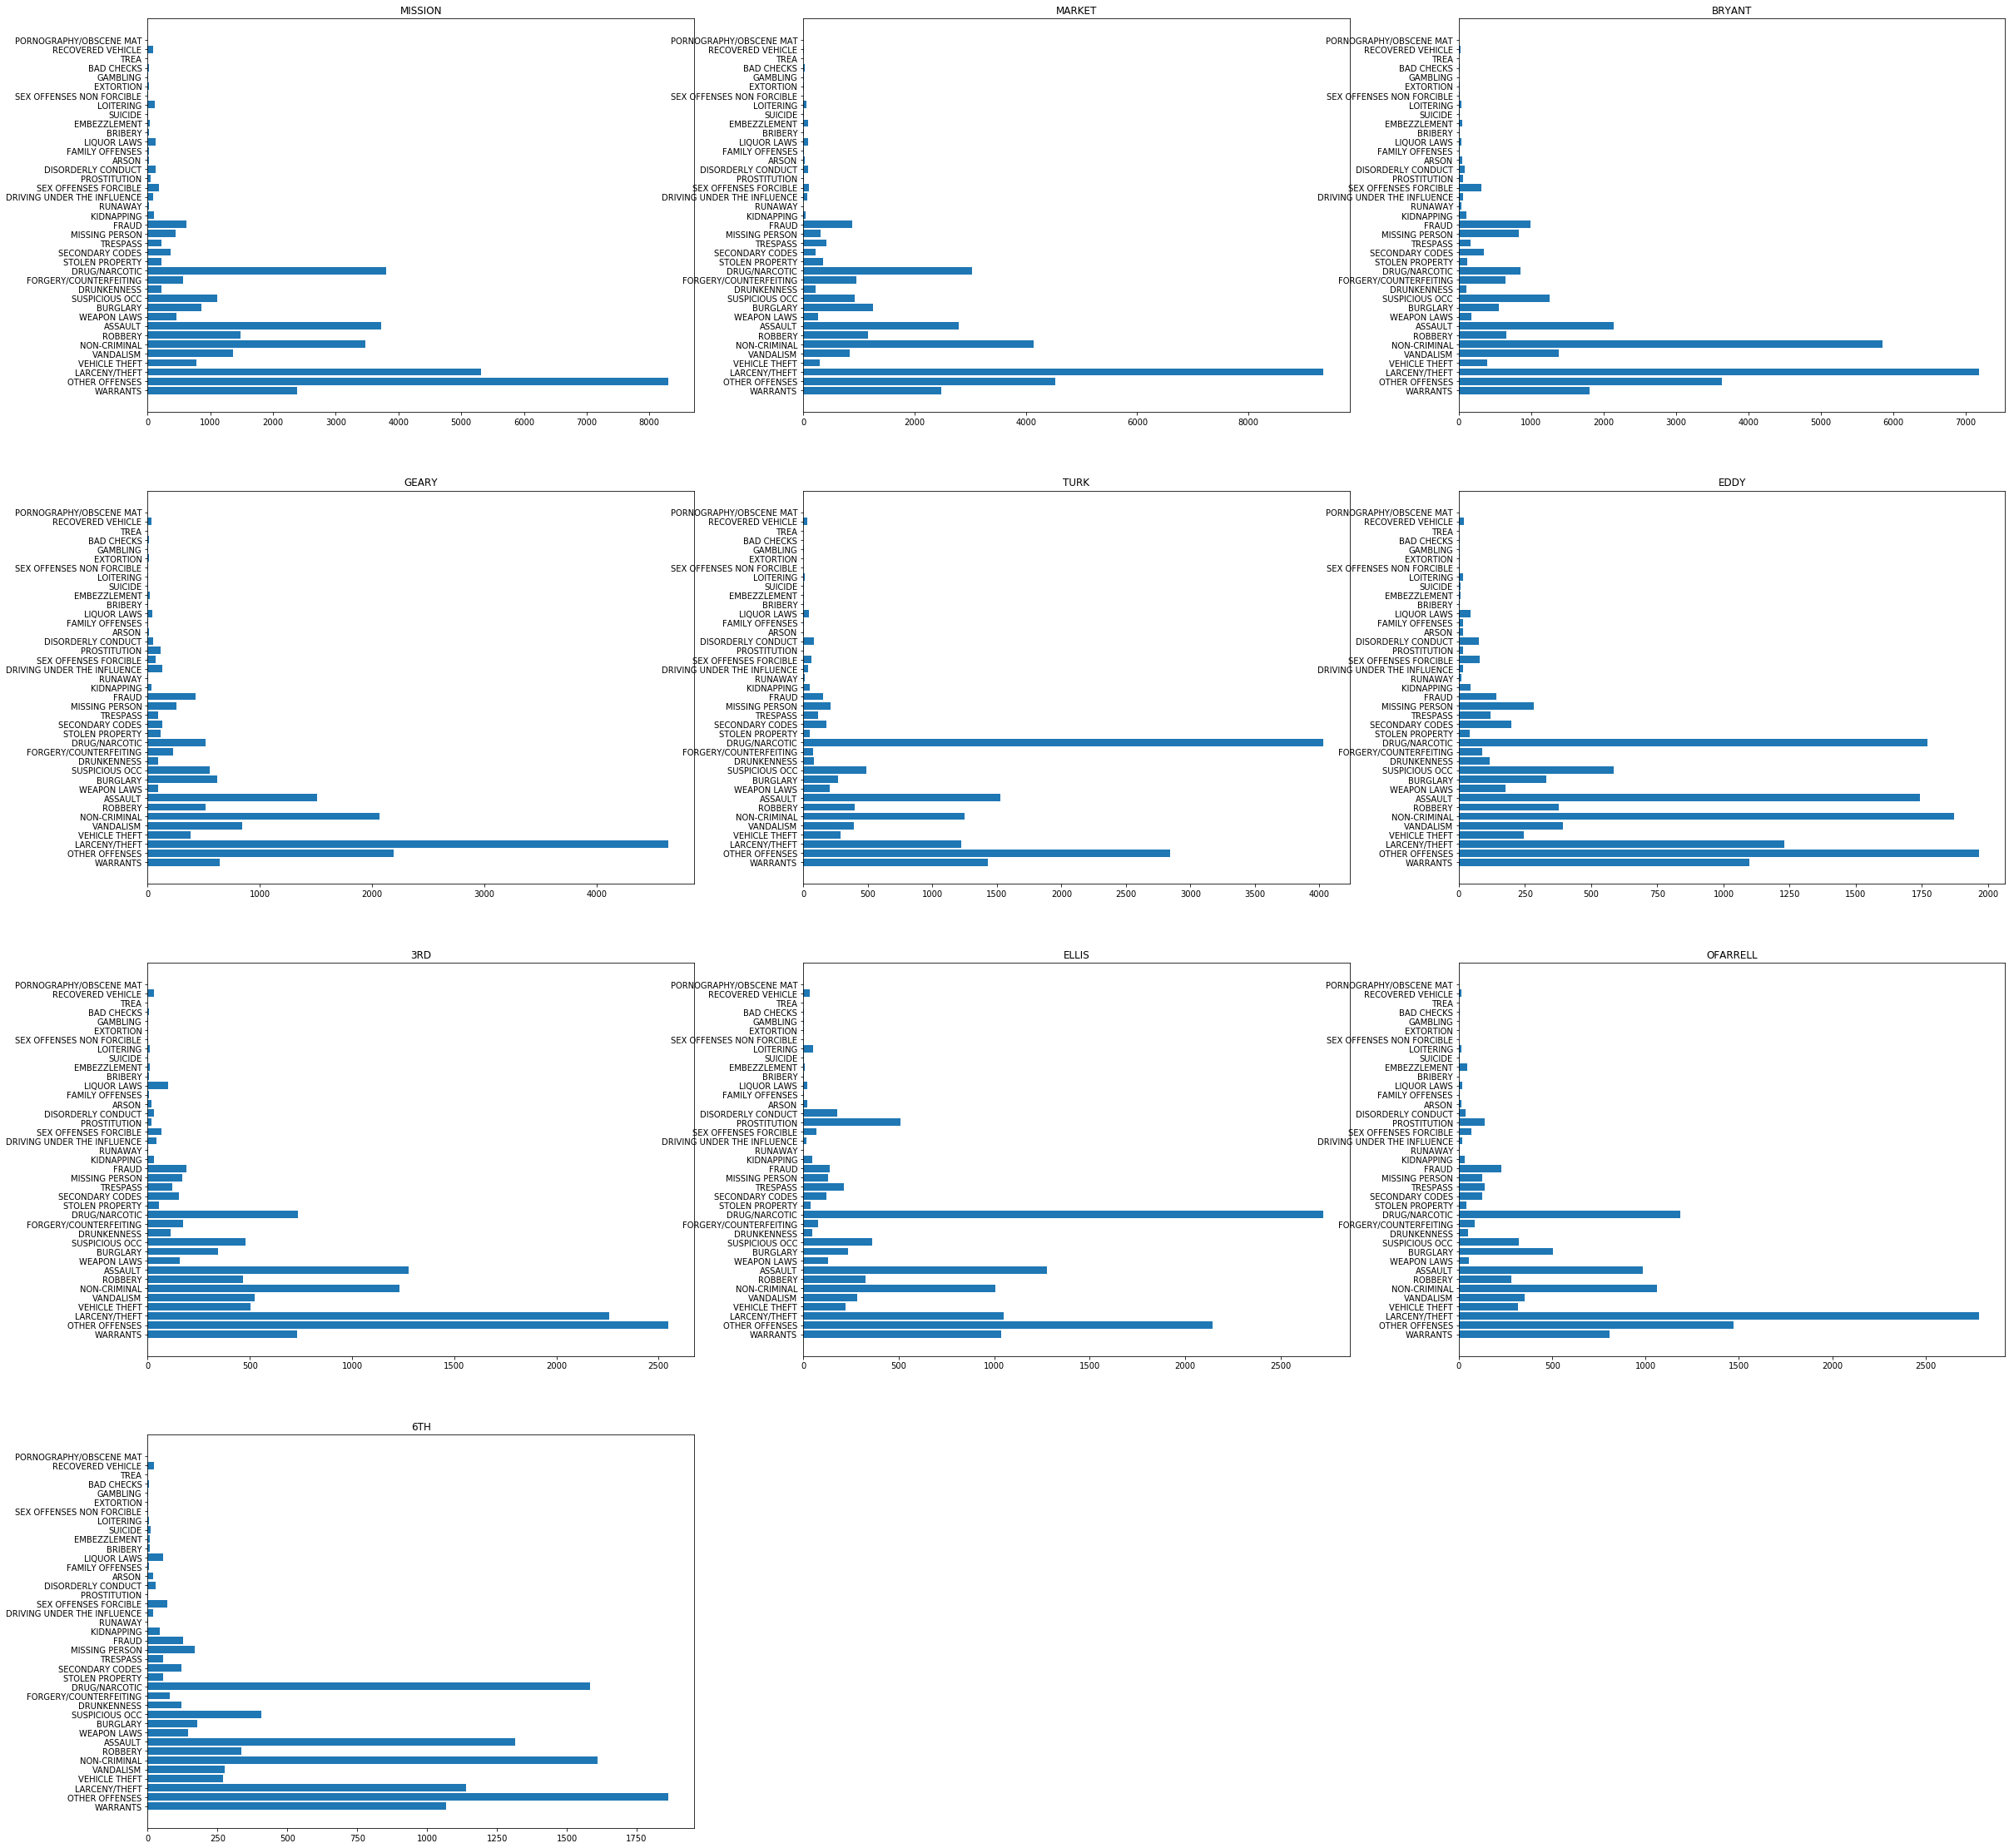

<module 'matplotlib.pyplot' from 'd:\\Anaconda3\\envs\\gym\\lib\\site-packages\\matplotlib\\pyplot.py'>

In [17]:
show_bar_by_column(data=features_data, 
                   split_feature="RoadName1",
                   split_feature_names = names[:10],
                   name='roadname1_and_categories_top10', 
                   figsize=(40,40))

In [16]:
tmp[tmp>1700][tmp<2000].shape

(12,)

In [23]:
#### 案件个数多余1700小于2000的道路名称

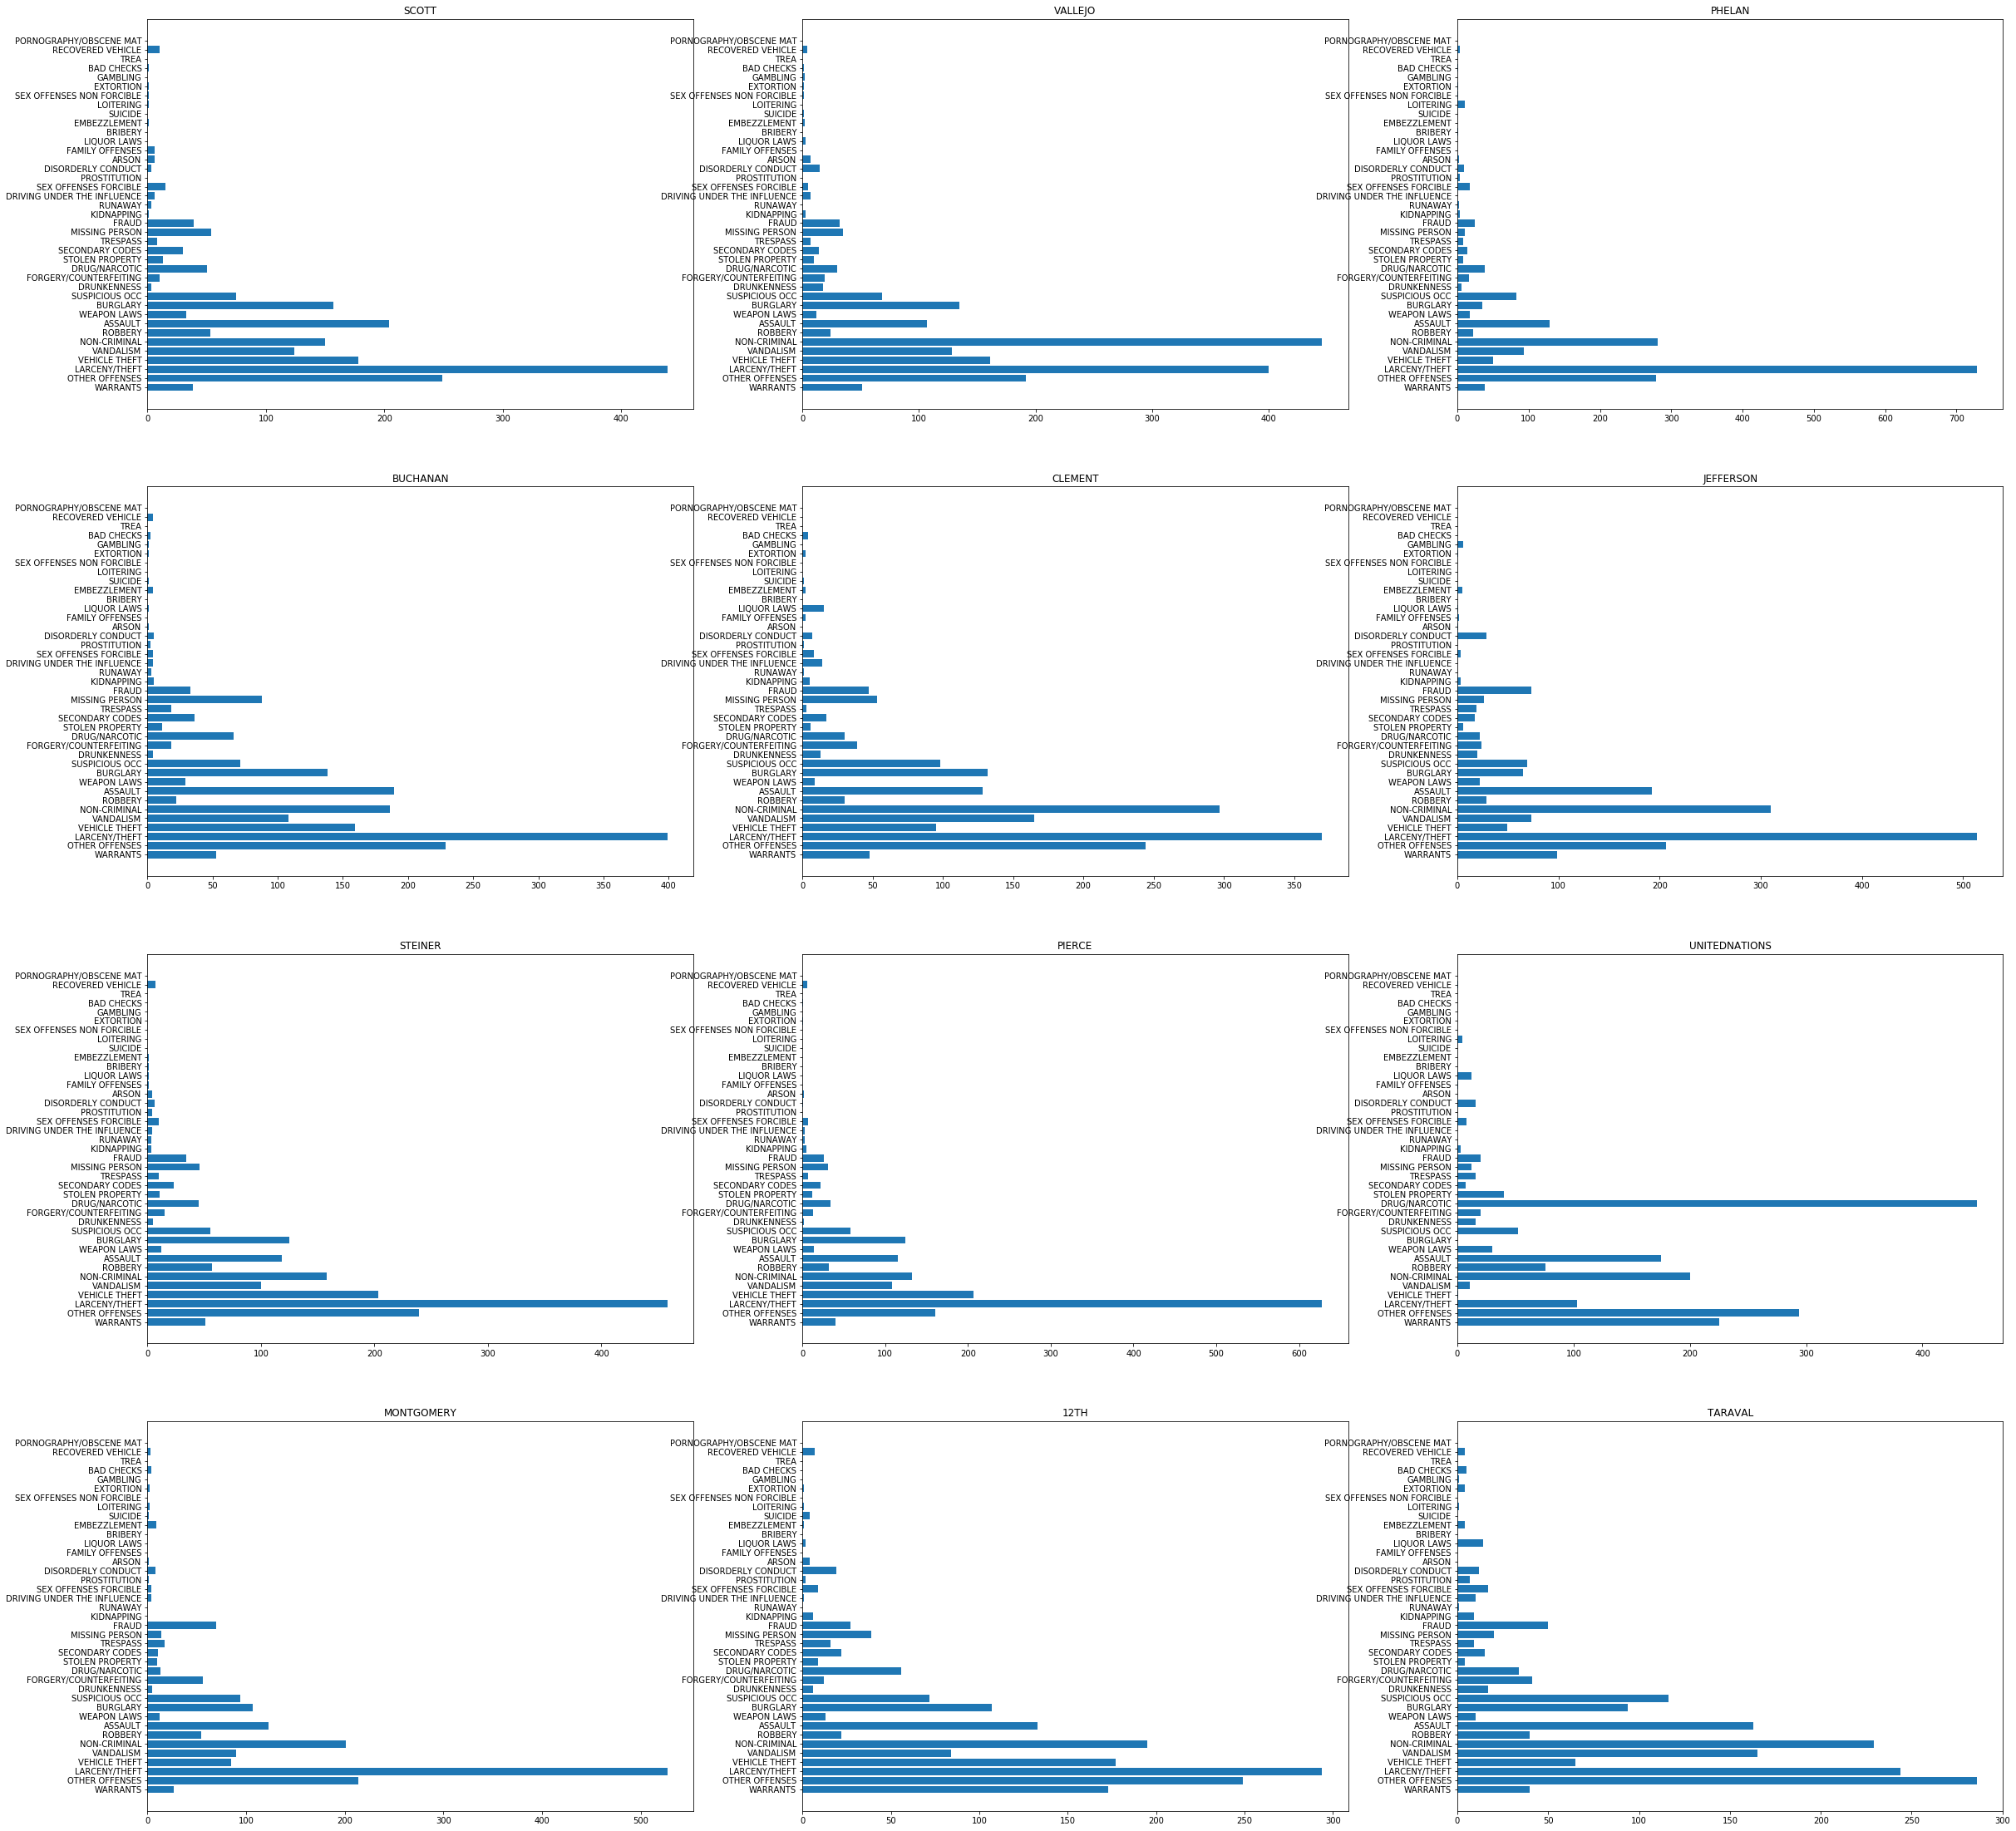

<module 'matplotlib.pyplot' from 'd:\\Anaconda3\\envs\\gym\\lib\\site-packages\\matplotlib\\pyplot.py'>

In [18]:
show_bar_by_column(data=features_data, 
                   split_feature="RoadName1",
                   split_feature_names = tmp[tmp>1700][tmp<2000].index.tolist(),
                   name='roadname1_and_categories_1700_2000', 
                   figsize=(40,50))

#### 指定某一道路名称后，观察不同道路编号的分布

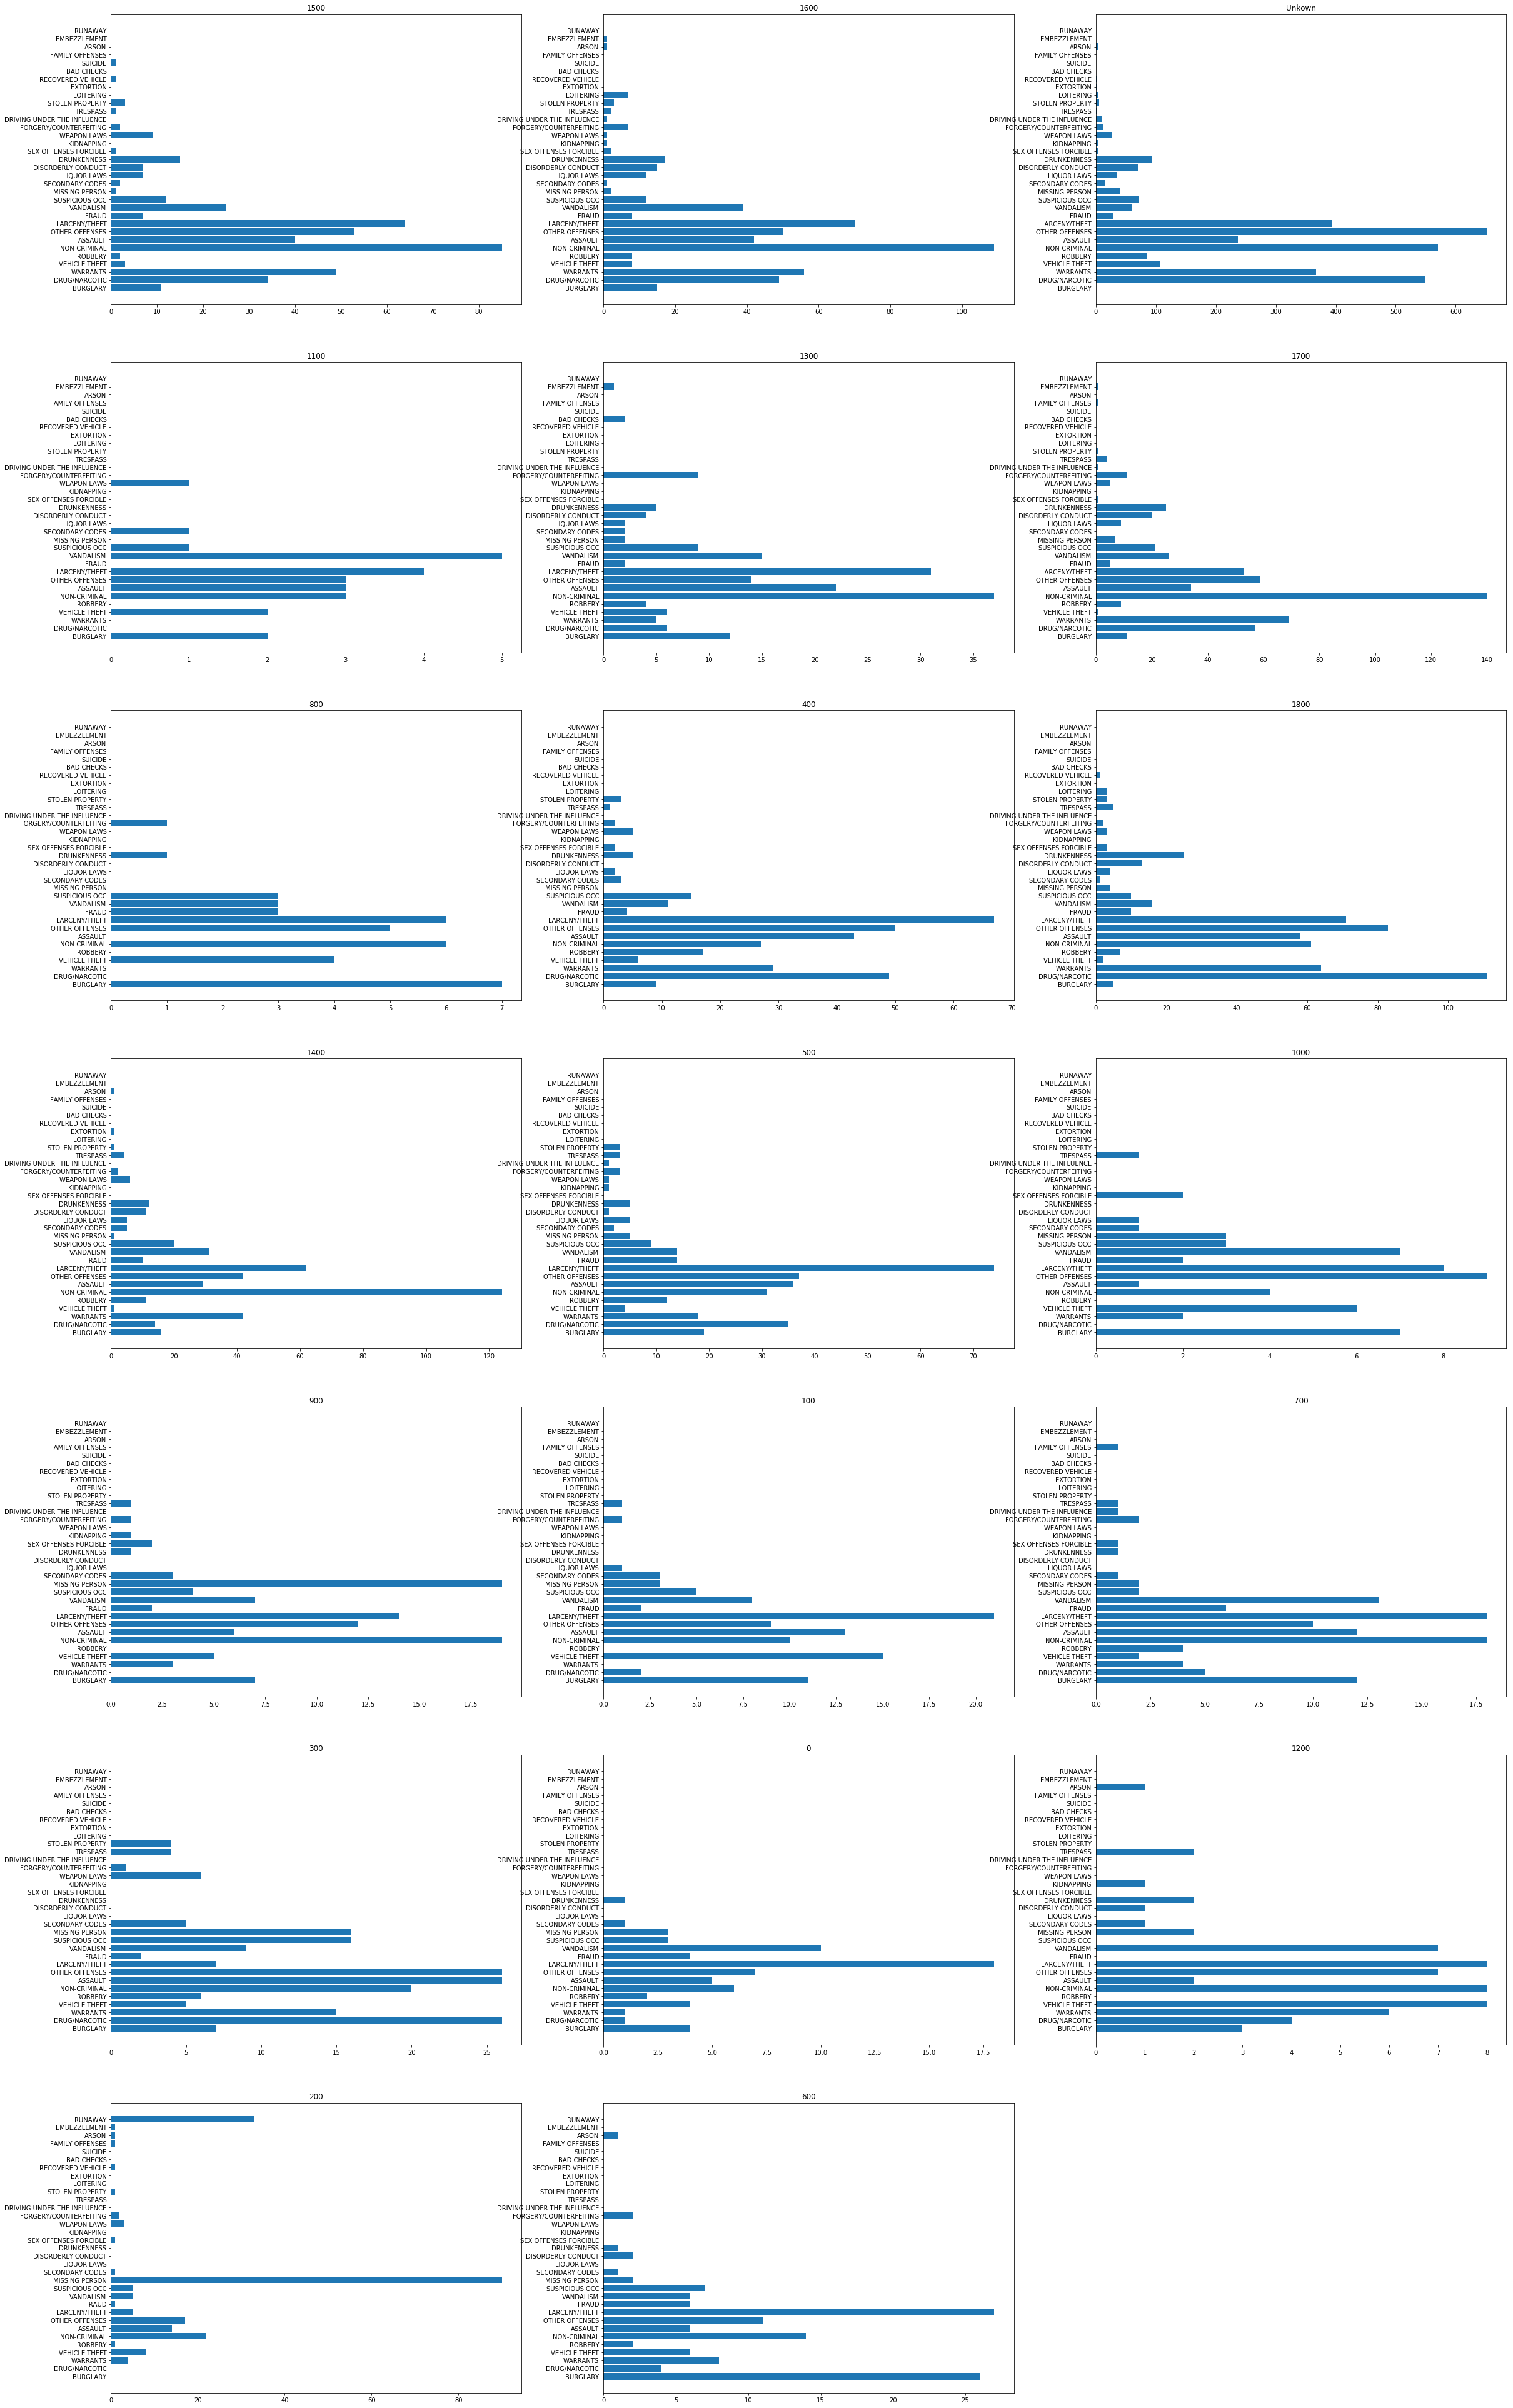

<module 'matplotlib.pyplot' from 'd:\\Anaconda3\\envs\\gym\\lib\\site-packages\\matplotlib\\pyplot.py'>

In [19]:
# 以"HAIGHT"为例
show_bar_by_column(data=features_data[features_data["RoadName1"]=="HAIGHT"], 
                   split_feature="RoadBlock",
                   name='roadblock_and_categories_HAIGHT', 
                   figsize=(40,70))

#### 训练集案件类型分布

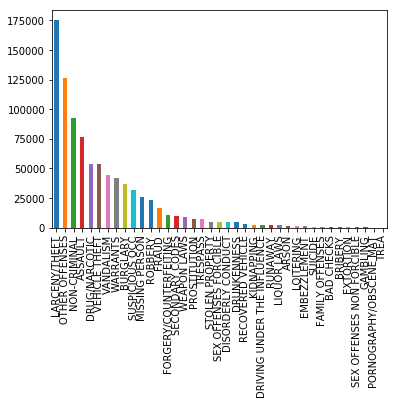

In [20]:
features_data["Category"].value_counts().plot.bar()

#### 同上，只是将案件类型名称重新排序

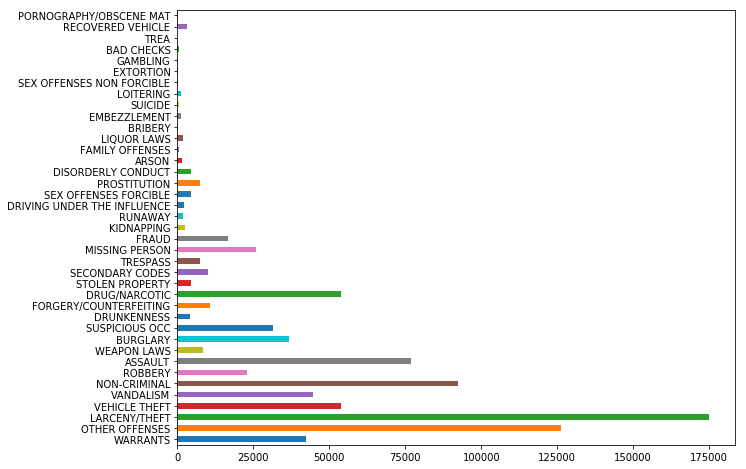

In [27]:
cnts = features_data["Category"].value_counts()
cates = features_data["Category"].unique()

data = [cnts[a] for a in cates]
new_data = pd.Series(index=cates, data=data)
new_data.plot.barh(figsize=(10,8))